<center><H1><B>PROYECTO 1 PARCIAL - GRUPO # 1


<Center><img src= https://i.ytimg.com/vi/e9Dc-f2I9AY/maxresdefault.jpg width="800" height="380"></Center> 

#**INFORMACIÓN**

### **Grupo#1**


*   Lady Siguencia
*   Jalmar Cedeño
*   Melanie Gavilanes
*   Dario Macias
*   Emilio Bletran





**TEMA:** Analisis Predictivo de ROE/ROA a través de indicadores financieros en las Empresas del Ecuador.

*   **AÑO - ENTRENAMIENTO:** 2019
*   **TABLA DE RESULTADOS - PREDICCIÓN:** 2017- 2018 - 2020
*   **CATEGORIAS**

DESCRIPCIÓN |RAMA 
--- | -------------- 
MINAS Y CANTERAS|B       
ARTES|R   
COMERCIO AL POR MAYOR|G 
AGRICULTURA |A     
ACTIVIDADES FINANCIERAS|K  
OTRAS ACTIVIDADES DE SERVICIOS |S  
SUMINISTRO DE ELECTRICIDAD|D   
ACTIVIDADES INMOBILIARIAS|L 
ENSEÑANZA. |P  
SERVICIOS ADMINISTRATIVOS|N   
COMUNICACION|J 
ACTIVIDADES PROFESIONALES|M  
SALUD HUMANA  |Q|
SERVICIO DE COMIDAS |I  
CONSTRUCCION |F  
INDUSTRIAS MANUFACTURERAS |C  

### **INTRODUCCIÓN**

*  El análisis de regresión es una técnica estadística para estudiar la relación entre
variables.
*  Tanto en el caso de dos variables (regresión simple) como en el caso de más de dos
variables (regresión múltiple), el análisis puede utilizarse para explorar y cuantificar la
relación entre una variable llamada dependiente o criterio (Y) y una o más variables
llamadas independientes, predictoras o regresoras (X1, X2, …, Xn).
*  El objetivo de la regresión es
descubrir la relación funcional entre la entrada y la salida de este sistema, para poder
así predecir la salida del sistema cuando se le presenta un dato de entrada nuevo.

### **IMPORTACIONES**

**A traves de esta cuadro de codigo se busca establecer una amplia gama de algoritmos de aprendizaje profundo.**

In [ ]:
import torch
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,  accuracy_score

**Establer conexión con nuestra cuenta de google drive para conectarnos con la parpeta donde se encuentran nuestros Datasets**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Llamamos a muestro archivo xlsx, nuestro dataset con la ruta en donde esta ubicado**

In [ ]:
#LLamar Datasets
df_indicadores2019 = pd.read_excel('/content/drive/My Drive/DataSets/indicadores2019_cia.xlsx')
df_indicadores2019 = df_indicadores2019[(df_indicadores2019['ROE']>-1) & (df_indicadores2019['ROE']<1) &(df_indicadores2019['ROA']>-1) & (df_indicadores2019['ROA']<1)]
df_indicadores2019

,AÑO,EXPEDIENTE,NOMBRE,RAMA,DESCRIPCIÓN RAMA,RAMA 6 DÍGITOS,SUBRAMA 2 DÍGITOS,LIQUIDEZ CORRIENTE,PRUEBA ÁCIDA,ENDEUDAMIENTO DEL ACTIVO,...,IMPACTO DE LA CARGA FINANCIERA,RENTABILIDAD NETA DEL ACTIVO,MARGEN BRUTO,MARGEN OPERACIONAL,RENTABILIDAD NETA DE VENTAS,RENTABILIDAD OPERACIONAL DEL PATRIMONIO,RENTABLIDAD FINANCIERA,UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS,ROE,ROA
0,2019,1,ACEITES TROPICALES SOCIEDAD ANONIMA ATSA,A,"AGRICULTURA, GANADERÃA, SILVICULTURA Y PESCA.",A0126.01,A01,4.596422,3.431308,0.033141,...,0.000686,0.011674,0.970512,0.690534,0.112763,0.073942,0.012075,0.071492,0.012075,0.011674
1,2019,2,ACERIA DEL ECUADOR CA ADELCA.,C,INDUSTRIAS MANUFACTURERAS.,C2410.25,C24,1.893063,0.778696,0.540985,...,0.054990,0.013612,0.175565,0.077136,0.020263,0.112893,0.029656,0.051820,0.029656,0.013612
2,2019,3,ACERO COMERCIAL ECUATORIANO S.A.,G,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...,G4659.99,G46,5.831770,2.356386,0.641227,...,0.007930,-0.016565,0.326322,-0.030833,-0.015524,-0.091704,-0.046171,-0.032901,-0.046171,-0.016565
3,2019,11,AEROVIAS DEL CONTINENTE AMERICANO S.A. AVIANCA,H,TRANSPORTE Y ALMACENAMIENTO.,H5110.01,H51,0.038086,0.038086,0.783258,...,0.026635,0.140248,1.000000,0.919185,0.699481,0.850316,0.647073,0.184299,0.647073,0.140248
4,2019,22,AGENCIAS Y REPRESENTACIONES CORDOVEZ SA,G,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...,G4630.95,G46,1.581688,0.856950,0.720654,...,0.012129,0.016383,0.106951,0.033751,0.015335,0.129077,0.058648,0.036057,0.058648,0.016383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85785,2019,730843,CONFIEXCPL CIA.LTDA.,G,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...,G4630.14,G46,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000
85786,2019,730879,TRANSACTIONECUADOR S.A.,G,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...,G4690.00,G46,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000
85787,2019,732355,AYANGUEMAR S.A.,N,ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE ...,N7990.05,N79,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000
85790,2019,735499,GETS TECNOLOGÃA MEDICA GETSMEDICAL S.A.,G,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...,G4610.09,G46,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000


#**LIMPIEZA DE TABLAS**

**isnull** a traves de iteraciones nos permite contar las columnas, contando para cada columna cuántos valores nulos hay y producir un nuevo marco de datos que muestre la suma de los valores **(sum())** junto con los nombres de encabezado de columna.

In [ ]:
df_indicadores2019.isnull().sum()

AÑO                                            0
EXPEDIENTE                                     0
NOMBRE                                         1
RAMA                                          14
DESCRIPCIÓN RAMA                              14
RAMA 6 DÍGITOS                                14
SUBRAMA 2 DÍGITOS                             14
LIQUIDEZ CORRIENTE                         18756
PRUEBA ÁCIDA                               18756
ENDEUDAMIENTO DEL ACTIVO                       0
ENDEUDAMIENTO PATRIMONIAL                      0
ENDEUDAMIENTO A CORTO PLAZO                16679
ENDEUDAMIENTO A LARGO PLAZO                16679
COBERTURA DE INTERESES                     39557
ENDEUDAMIENTO DEL ACTIVO FIJO              29892
APALANCAMIENTO                                 0
APALANCAMIENTO FINANCIERO                  18662
FORTALEZA PATRIMONIAL                          0
ENDEUDAMIENTO PATRIMONIAL CORRIENTE            0
ENDEUDAMIENTO PATRIMONIAL NO CORRIENTE         0
APALANCAMIENTO A COR

In [ ]:
df_indicadores2019.duplicated().any()
df_indicadores2019.dropna(inplace=True)
df_indicadores2019.shape

(13319, 37)

## **Información de Variables**

In [ ]:
df_indicadores2019.isnull().any()

AÑO                                        False
EXPEDIENTE                                 False
NOMBRE                                     False
RAMA                                       False
DESCRIPCIÓN RAMA                           False
RAMA 6 DÍGITOS                             False
SUBRAMA 2 DÍGITOS                          False
LIQUIDEZ CORRIENTE                         False
PRUEBA ÁCIDA                               False
ENDEUDAMIENTO DEL ACTIVO                   False
ENDEUDAMIENTO PATRIMONIAL                  False
ENDEUDAMIENTO A CORTO PLAZO                False
ENDEUDAMIENTO A LARGO PLAZO                False
COBERTURA DE INTERESES                     False
ENDEUDAMIENTO DEL ACTIVO FIJO              False
APALANCAMIENTO                             False
APALANCAMIENTO FINANCIERO                  False
FORTALEZA PATRIMONIAL                      False
ENDEUDAMIENTO PATRIMONIAL CORRIENTE        False
ENDEUDAMIENTO PATRIMONIAL NO CORRIENTE     False
APALANCAMIENTO A COR

###**Columnas**

**Verificar las categorias de las columnas**

In [ ]:
df_indicadores2019.columns

Index(['AÑO', 'EXPEDIENTE', 'NOMBRE', 'RAMA', 'DESCRIPCIÓN RAMA',
       'RAMA 6 DÍGITOS', 'SUBRAMA 2 DÍGITOS', 'LIQUIDEZ CORRIENTE',
       'PRUEBA ÁCIDA', 'ENDEUDAMIENTO DEL ACTIVO', 'ENDEUDAMIENTO PATRIMONIAL',
       'ENDEUDAMIENTO A CORTO PLAZO', 'ENDEUDAMIENTO A LARGO PLAZO',
       'COBERTURA DE INTERESES', 'ENDEUDAMIENTO DEL ACTIVO FIJO',
       'APALANCAMIENTO', 'APALANCAMIENTO FINANCIERO', 'FORTALEZA PATRIMONIAL',
       'ENDEUDAMIENTO PATRIMONIAL CORRIENTE',
       'ENDEUDAMIENTO PATRIMONIAL NO CORRIENTE',
       'APALANCAMIENTO A CORTO Y LARGO PLAZO', 'ROTACIÓN DE CARTERA',
       'ROTACIÓN DE ACTIVO FIJO', 'ROTACIÓN DE VENTAS',
       'PERIODO MEDIO DE COBRANZA CORTO PLAZO',
       'PERIODO MEDIO DE PAGO CORTO PLAZO',
       'IMPACTO GASTOS ADMINISTRACIÓN Y VENTAS',
       'IMPACTO DE LA CARGA FINANCIERA', 'RENTABILIDAD NETA DEL ACTIVO',
       'MARGEN BRUTO', 'MARGEN OPERACIONAL', 'RENTABILIDAD NETA DE VENTAS',
       'RENTABILIDAD OPERACIONAL DEL PATRIMONIO', 'RENTABLIDA

###**Numero De Datos Fila**

In [ ]:
len(df_indicadores2019)

13319

In [ ]:
df_indicadores2019['ROE'].describe()

count    13319.000000
mean         0.118447
std          0.276630
min         -0.999867
25%          0.006291
50%          0.069792
75%          0.211079
max          0.999334
Name: ROE, dtype: float64

In [ ]:
df_indicadores2019['ROA'].describe()

count    13319.000000
mean         0.031985
std          0.097081
min         -0.972857
25%          0.001613
50%          0.018345
75%          0.056166
max          0.897318
Name: ROA, dtype: float64

#**Análisis Exploratorio**

**Este gráfico nos permite idenificar los valores del ROE para su posterior análisis**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


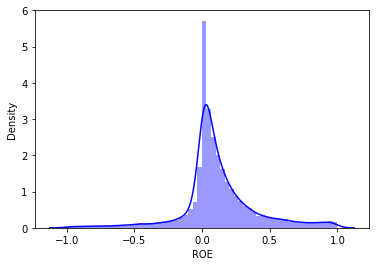

In [ ]:
sns.distplot(df_indicadores2019['ROE'],color ='blue',bins=60)

**Este gráfico nos permite idenificar los valores del ROA para su posterior análisis**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


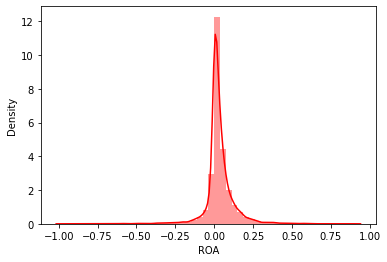

In [ ]:
sns.distplot(df_indicadores2019['ROA'],color ='red',bins=50)

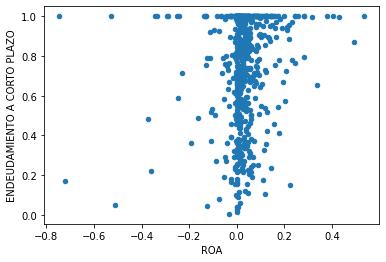

In [ ]:
df_indicadores2019[df_indicadores2019['ROE']<60].sample(600).plot.scatter(x='ROA', y='ENDEUDAMIENTO A CORTO PLAZO')

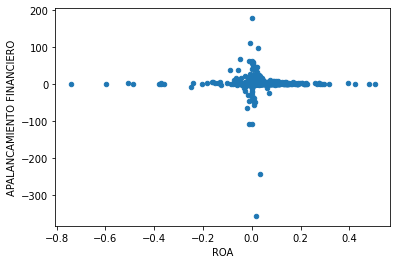

In [ ]:
df_indicadores2019[df_indicadores2019['ROA']<60].sample(600).plot.scatter(x='ROA', y='APALANCAMIENTO FINANCIERO')

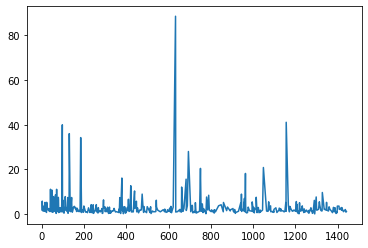

In [ ]:
y = df_indicadores2019['LIQUIDEZ CORRIENTE'][:500]
plt.plot(y)
plt.show()

**En la siguente gráfica se busca establecer cuales son las varibles que estan relacionadas a razón del ROA y ROE**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

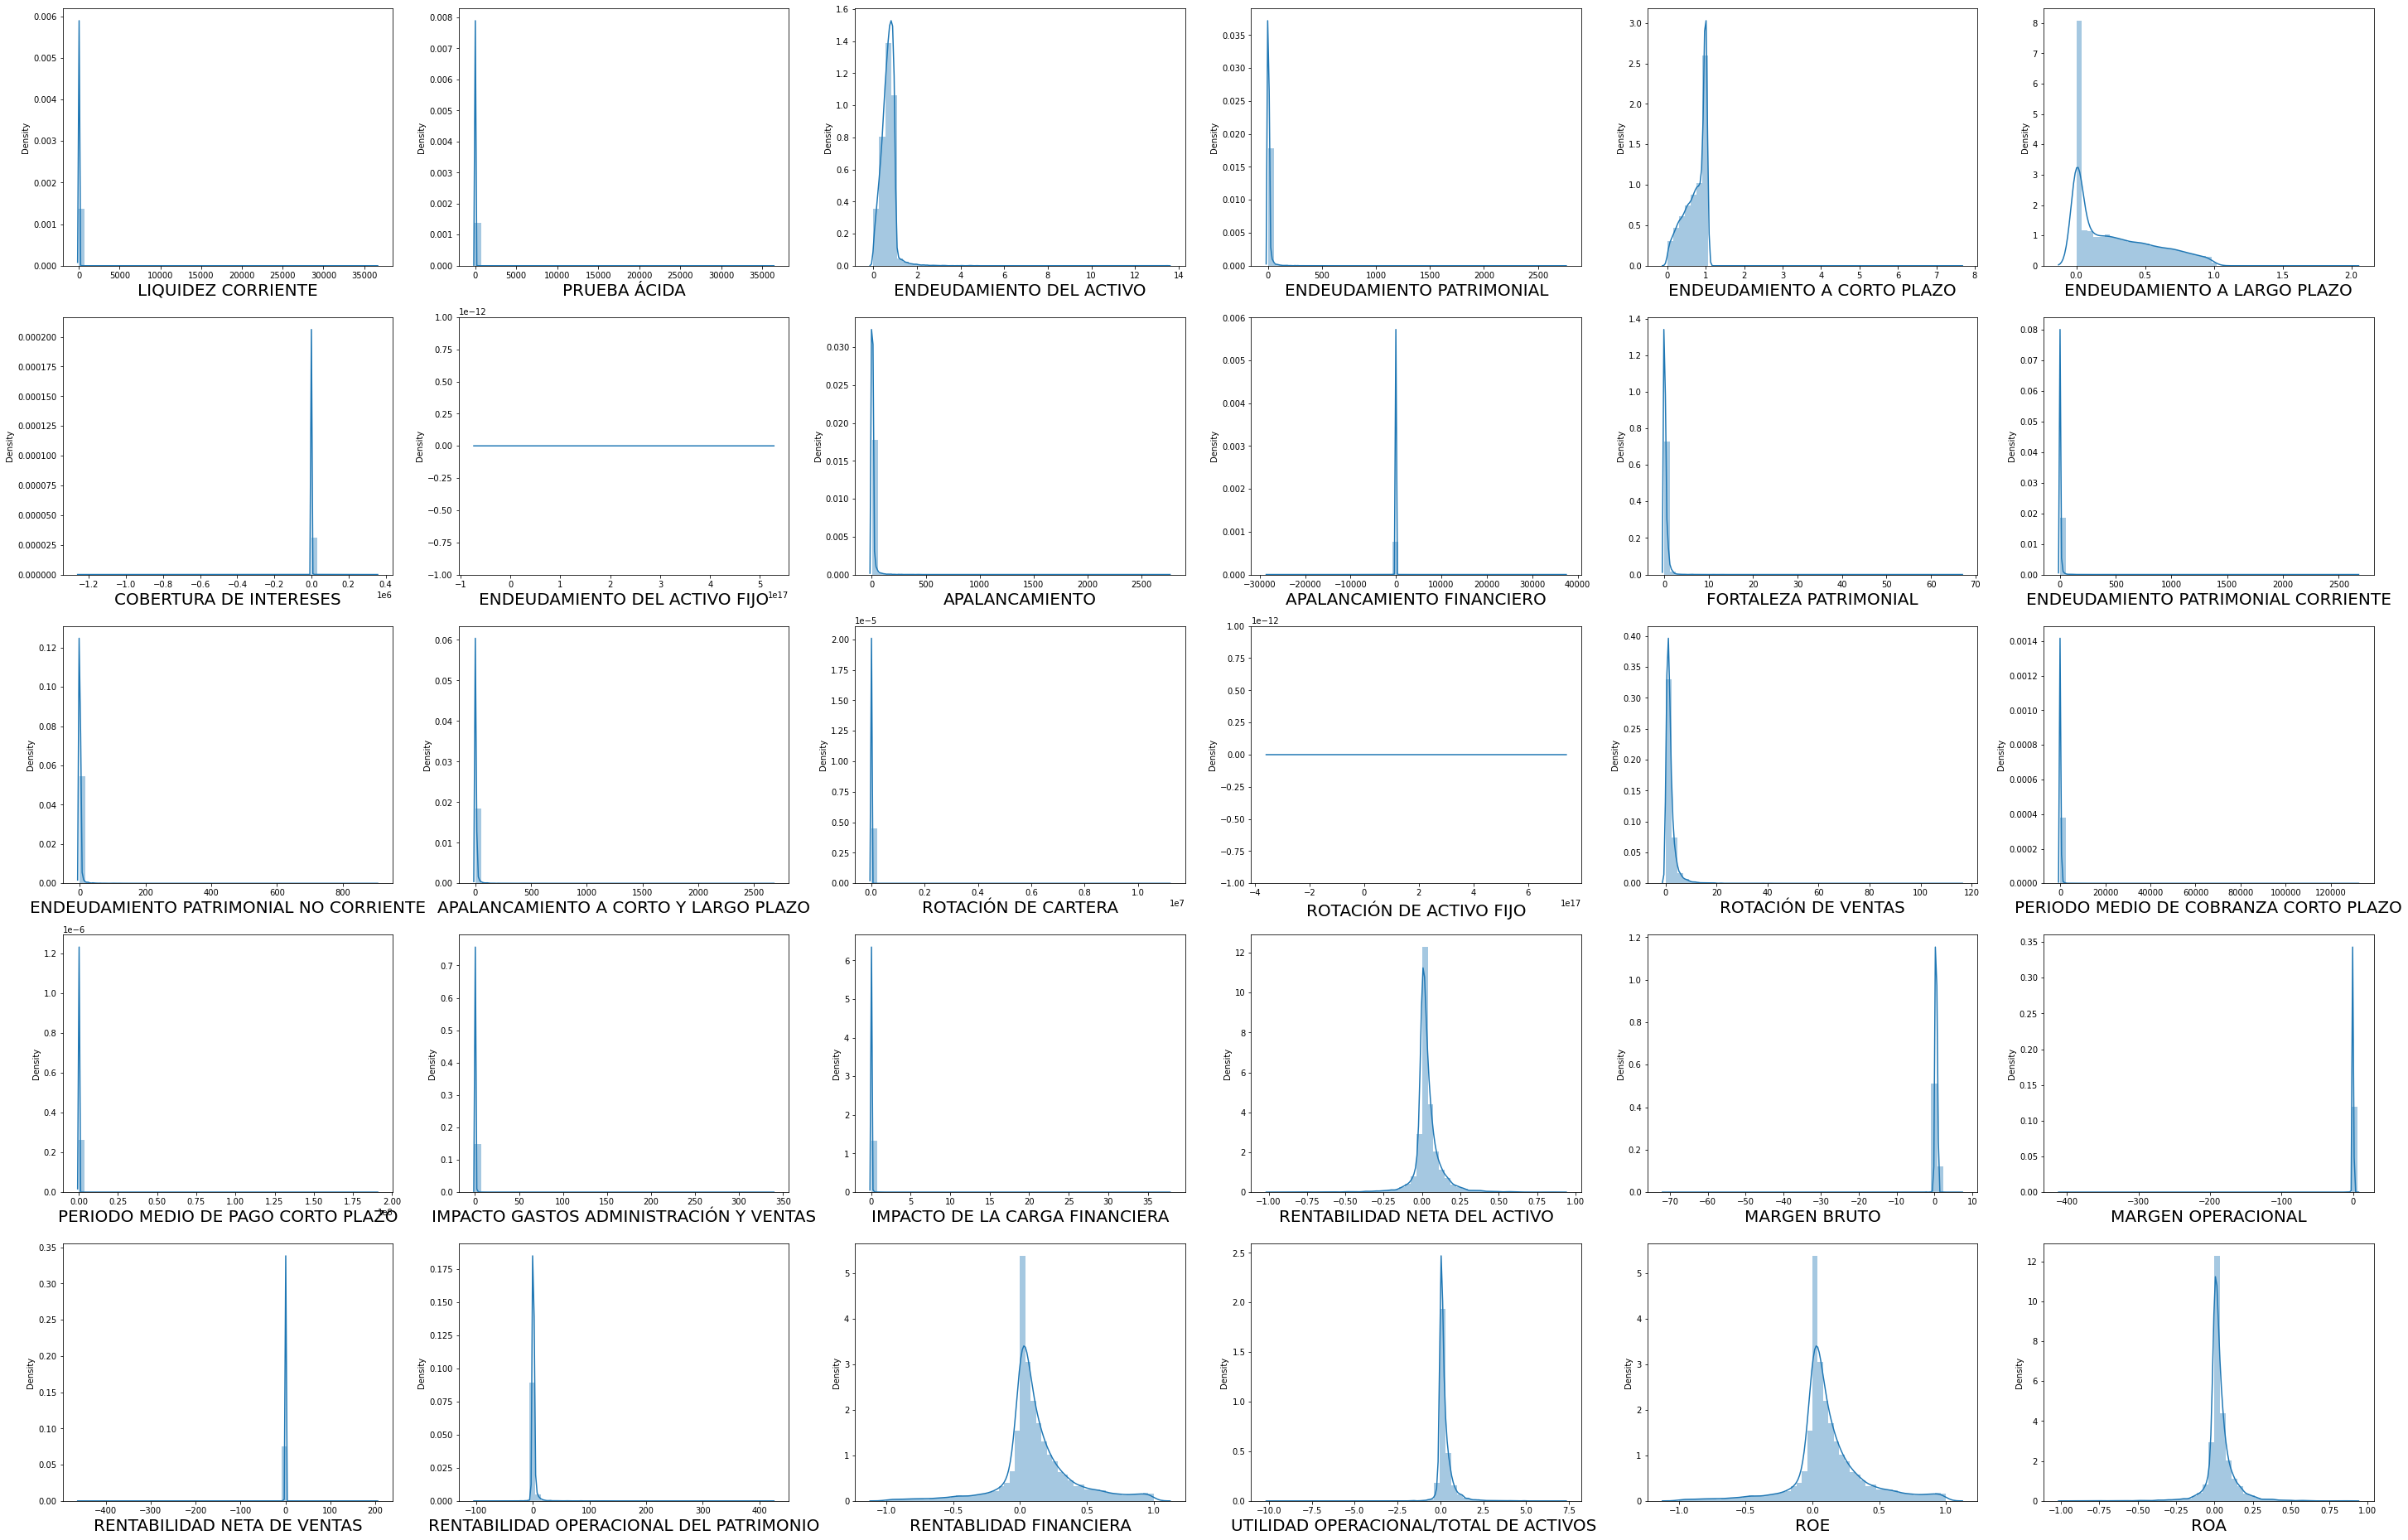

In [ ]:
dfs_corr = df_indicadores2019.drop(['AÑO','NOMBRE',	'EXPEDIENTE', 'RAMA', 'DESCRIPCIÓN RAMA','RAMA 6 DÍGITOS', 'SUBRAMA 2 DÍGITOS'], axis=1)
plt.figure(figsize=(50,40), facecolor='white')
plotnumber = 1

for column in dfs_corr.columns:
    if plotnumber<32 : ## 14 columns in data 
        plt.subplot(6,6,plotnumber)## 4 : rows , 4: columns , plotnumber : position of plot
        sns.distplot(dfs_corr[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

##**Selección Variables**

In [ ]:
dfs_corr.corr()

,LIQUIDEZ CORRIENTE,PRUEBA ÁCIDA,ENDEUDAMIENTO DEL ACTIVO,ENDEUDAMIENTO PATRIMONIAL,ENDEUDAMIENTO A CORTO PLAZO,ENDEUDAMIENTO A LARGO PLAZO,COBERTURA DE INTERESES,ENDEUDAMIENTO DEL ACTIVO FIJO,APALANCAMIENTO,APALANCAMIENTO FINANCIERO,...,IMPACTO DE LA CARGA FINANCIERA,RENTABILIDAD NETA DEL ACTIVO,MARGEN BRUTO,MARGEN OPERACIONAL,RENTABILIDAD NETA DE VENTAS,RENTABILIDAD OPERACIONAL DEL PATRIMONIO,RENTABLIDAD FINANCIERA,UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS,ROE,ROA
LIQUIDEZ CORRIENTE,1.000000,0.999472,0.012433,-0.001330,-0.028973,0.029510,-0.000299,0.000404,-0.001755,0.000055,...,-0.000524,-0.017581,-0.002931,-0.004422,-0.003235,-0.002801,-0.019454,-0.009226,-0.019454,-0.017581
PRUEBA ÁCIDA,0.999472,1.000000,0.013155,-0.001493,-0.026204,0.026693,-0.000302,0.000404,-0.001919,0.000057,...,-0.000494,-0.017279,-0.002835,-0.004359,-0.003235,-0.002478,-0.018908,-0.008313,-0.018908,-0.017279
ENDEUDAMIENTO DEL ACTIVO,0.012433,0.013155,1.000000,0.152444,-0.104423,0.102792,0.000822,-0.015763,0.147648,-0.001890,...,0.023565,-0.297199,-0.036138,-0.011839,-0.002567,0.091722,-0.003643,-0.078314,-0.003643,-0.297199
ENDEUDAMIENTO PATRIMONIAL,-0.001330,-0.001493,0.152444,1.000000,-0.028630,0.028760,0.001491,-0.002124,0.999953,-0.018568,...,0.008171,-0.045244,-0.002908,0.003007,0.002163,0.403544,0.044210,-0.030504,0.044210,-0.045244
ENDEUDAMIENTO A CORTO PLAZO,-0.028973,-0.026204,-0.104423,-0.028630,1.000000,-0.968010,0.004451,-0.004238,-0.028288,-0.001320,...,-0.041246,0.132770,-0.034440,-0.005117,0.002053,0.001976,0.110091,0.082164,0.110091,0.132770
ENDEUDAMIENTO A LARGO PLAZO,0.029510,0.026693,0.102792,0.028760,-0.968010,1.000000,-0.004553,0.004298,0.028584,0.001361,...,0.041963,-0.134877,0.036320,0.005605,-0.002056,0.000275,-0.111314,-0.072185,-0.111314,-0.134877
COBERTURA DE INTERESES,-0.000299,-0.000302,0.000822,0.001491,0.004451,-0.004553,1.000000,0.000029,0.001474,0.000847,...,-0.000924,0.018984,0.008557,0.003592,0.000249,0.010167,0.018745,0.031457,0.018745,0.018984
ENDEUDAMIENTO DEL ACTIVO FIJO,0.000404,0.000404,-0.015763,-0.002124,-0.004238,0.004298,0.000029,1.000000,-0.002105,-0.000014,...,-0.000631,0.027658,-0.000041,0.000690,0.000864,-0.001396,0.010544,0.000828,0.010544,0.027658
APALANCAMIENTO,-0.001755,-0.001919,0.147648,0.999953,-0.028288,0.028584,0.001474,-0.002105,1.000000,-0.018502,...,0.007670,-0.042566,-0.002772,0.003270,0.002421,0.403602,0.046119,-0.030043,0.046119,-0.042566
APALANCAMIENTO FINANCIERO,0.000055,0.000057,-0.001890,-0.018568,-0.001320,0.001361,0.000847,-0.000014,-0.018502,1.000000,...,-0.000151,0.000548,-0.001940,0.001704,-0.000138,0.055249,0.000739,0.007552,0.000739,0.000548


## **MAPA DE CALOR**

**Objetivo:** representar los datos a través de un  gráfica, donde los valores individuales contenidos en una matriz se representan como colores. Este mapa de calor es perfectos para explorar la correlación de características en un conjunto de datos.

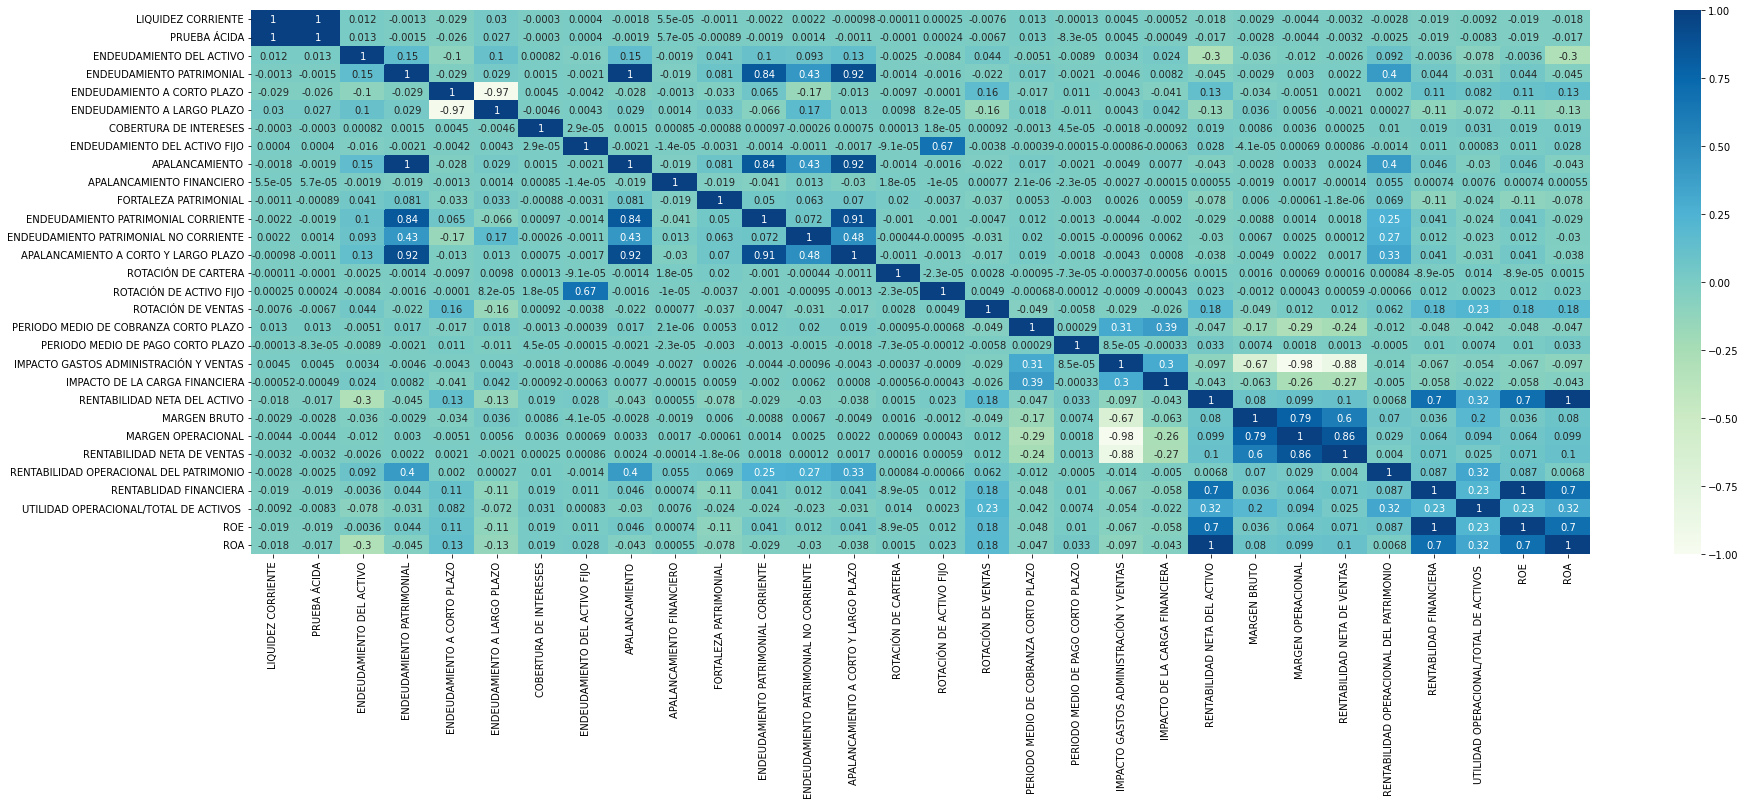

In [ ]:
plt.figure(figsize=(30,10))
sns.heatmap(dfs_corr.corr(),vmin=-1, vmax=1, annot=True, cmap="GnBu")

###**MAYOR CORRELACCIÓN ROE**
-- | Indicador ROE | Correlacción 
--- | -------------- | ---------- 
1.   |RENTABLIDAD FINANCIERA |1
2.   |RENTABILIDAD NETA DEL ACTIVO |0.7
3.   |UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS |0.23
4.   |ROTACION DE VENTAS| 0.18
5.   |ENDEUDAMIENTO PATRIMONIAL CORRIENTE|0.041


###**MAYOR CORRELACCIÓN ROA**

-- | Indicador ROA | Correlacción 
--- | -------------- | ---------- 
1.   |RENTABILIDAD NETA DEL ACTIVO|1
2.   |RENTABLIDAD FINANCIERA |0.7
3.   |RENTABILIDAD NETA DE VENTAS|0.1
4.   |ENDEUDAMIENTO A CORTO PLAZO| 0.13
5.   |ROTACIÓN DE ACTIVO FIJO |0.023




#**Modelo De Regresión Lineal -- ROE**

**Objetivos**
*  Establecer muestras variables para el modelo de regresion lineal.
*  Establer un rango, donde se puedan eliminar los outlier, con el fin de utilizar datos mas relacionados y predecir mejor.


In [ ]:
dfs_rg_l =  df_indicadores2019[['ROE','DESCRIPCIÓN RAMA','RAMA','RENTABLIDAD FINANCIERA','RENTABILIDAD NETA DEL ACTIVO','UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS ','ROTACIÓN DE VENTAS','ENDEUDAMIENTO PATRIMONIAL CORRIENTE']]
#Remover Outliers
dfs_rg_l = dfs_rg_l[(dfs_rg_l['ROE'] > -1) & (dfs_rg_l['ROE'] < 1) & (dfs_rg_l['RENTABLIDAD FINANCIERA'] < 100) & (dfs_rg_l['UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS '] > -10) &
            (dfs_rg_l['RENTABILIDAD NETA DEL ACTIVO'] > -3) & (dfs_rg_l['ROTACIÓN DE VENTAS'] < 10) & (dfs_rg_l['ENDEUDAMIENTO PATRIMONIAL CORRIENTE'] < 400)]
dfs_rg_l

,ROE,DESCRIPCIÓN RAMA,RAMA,RENTABLIDAD FINANCIERA,RENTABILIDAD NETA DEL ACTIVO,UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS,ROTACIÓN DE VENTAS,ENDEUDAMIENTO PATRIMONIAL CORRIENTE
1,0.029656,INDUSTRIAS MANUFACTURERAS.,C,0.029656,0.013612,0.051820,0.671793,0.113988
2,-0.046171,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...,G,-0.046171,-0.016565,-0.032901,1.067048,0.354377
4,0.058648,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...,G,0.058648,0.016383,0.036057,1.068332,0.897483
7,-0.147701,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...,G,-0.147701,-0.031462,-0.030758,0.576668,2.367937
8,0.055154,INDUSTRIAS MANUFACTURERAS.,C,0.055154,0.028136,0.359713,1.113214,0.290333
...,...,...,...,...,...,...,...,...
84611,0.811431,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...,G,0.811431,0.185371,0.248641,0.885263,3.073462
84795,0.556272,ACTIVIDADES DE ATENCIÃ“N DE LA SALUD HUMANA Y ...,Q,0.556272,0.031278,0.040117,0.808590,16.785009
84841,0.909427,"AGRICULTURA, GANADERÃA, SILVICULTURA Y PESCA.",A,0.909427,0.094858,0.362786,0.712141,8.255990
85410,-0.480129,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...,G,-0.480129,-0.053135,-0.052482,0.020025,2.032548


**Mostrar Datos de la Matriz ROA**

In [ ]:
dfs_Y = dfs_rg_l[['ROE']]
dfs_Y

,ROE
1,0.029656
2,-0.046171
4,0.058648
7,-0.147701
8,0.055154
...,...
84611,0.811431
84795,0.556272
84841,0.909427
85410,-0.480129


**Relacionamos las variables "X"**

In [ ]:
dfs_X = dfs_rg_l[[ 'RENTABLIDAD FINANCIERA','RENTABILIDAD NETA DEL ACTIVO','UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS ','ROTACIÓN DE VENTAS','ENDEUDAMIENTO PATRIMONIAL CORRIENTE']]
dfs_X

,RENTABLIDAD FINANCIERA,RENTABILIDAD NETA DEL ACTIVO,UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS,ROTACIÓN DE VENTAS,ENDEUDAMIENTO PATRIMONIAL CORRIENTE
1,0.029656,0.013612,0.051820,0.671793,0.113988
2,-0.046171,-0.016565,-0.032901,1.067048,0.354377
4,0.058648,0.016383,0.036057,1.068332,0.897483
7,-0.147701,-0.031462,-0.030758,0.576668,2.367937
8,0.055154,0.028136,0.359713,1.113214,0.290333
...,...,...,...,...,...
84611,0.811431,0.185371,0.248641,0.885263,3.073462
84795,0.556272,0.031278,0.040117,0.808590,16.785009
84841,0.909427,0.094858,0.362786,0.712141,8.255990
85410,-0.480129,-0.053135,-0.052482,0.020025,2.032548


**Graficas de los valores y rango de las varibeles "X"**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a9bedda00>,
      dtype=object)

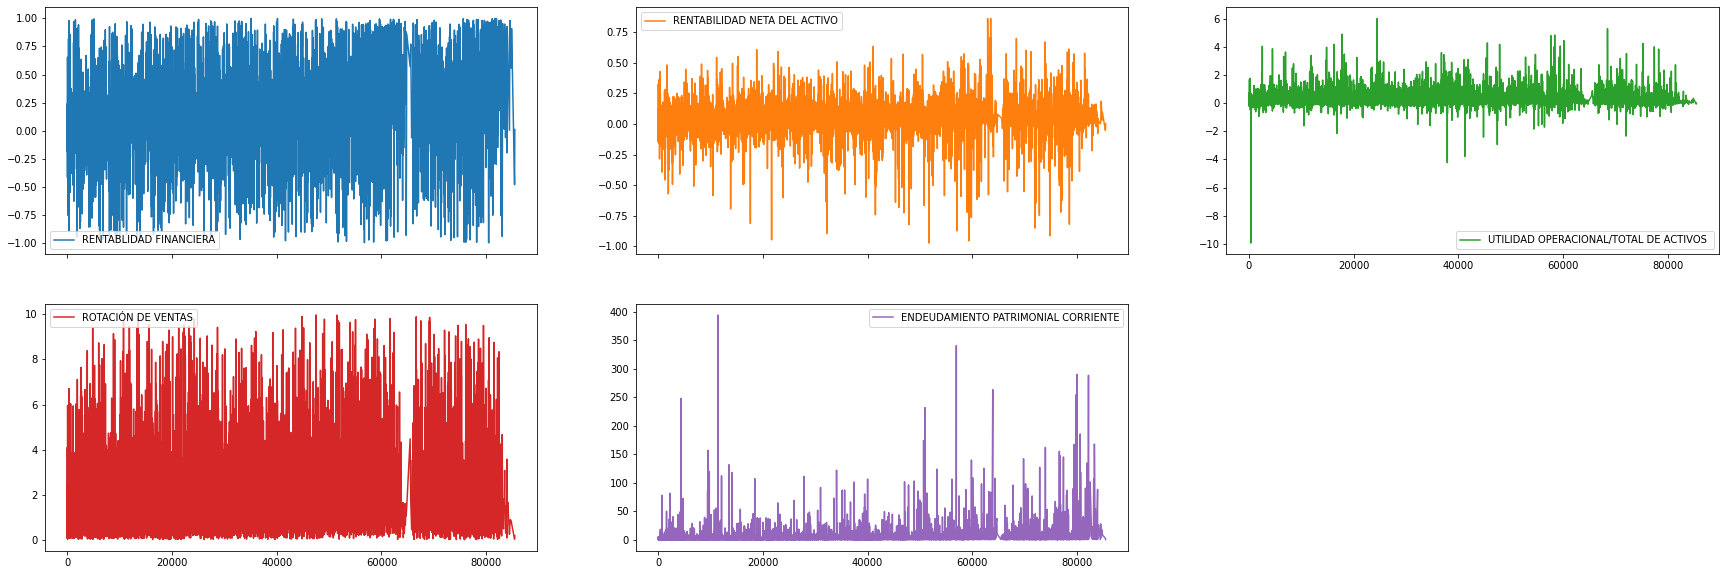

In [ ]:
dfs_X.plot(subplots=True, layout=(-1,3), figsize=(30,10) )

**Graficas de los valores y rango de las varibeles "Y / ROE"**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a9cf04d00>,
      dtype=object)

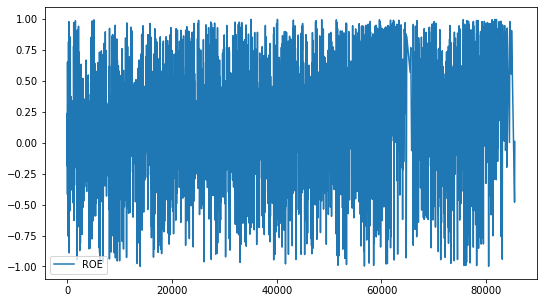

In [ ]:
dfs_Y.plot(subplots=True, layout=(-1,3), figsize=(30,5) )

###**ENTRENAMIENTO**

*  La idea detrás de StandardScaler es que transformará sus datos de modo que su distribución tenga un valor medio de 0 y una desviación estándar de 1. 
*  En el caso de datos multivariados, esto se hace en función de las características.

In [ ]:
dfs_X.values
dfs_Y.values

scaler = StandardScaler()
inputs = scaler.fit_transform(dfs_X)
dX = np.array(inputs, dtype='float32')
dY = np.array(dfs_Y, dtype='float32')


In [ ]:
dX

array([[-0.31432542, -0.18286513, -0.4306361 , -0.71292365, -0.26032755],
       [-0.5903921 , -0.49822268, -0.6263522 , -0.45292455, -0.24079236],
       [-0.20877016, -0.15390992, -0.46704963, -0.4520798 , -0.19665705],
       ...,
       [ 2.8887115 ,  0.666161  ,  0.2877413 , -0.6863824 ,  0.40132943],
       [-2.17033   , -0.8803852 , -0.6715887 , -1.1416572 , -0.10441642],
       [-0.3825036 , -0.30959338, -0.5353704 , -1.0414879 , -0.2695907 ]],
      dtype=float32)

In [ ]:
dY

array([[ 0.02965559],
       [-0.04617107],
       [ 0.05864824],
       ...,
       [ 0.90942705],
       [-0.48012927],
       [ 0.01092923]], dtype=float32)

**Verificar las dimenciones de muestras matrices a utilizar**

In [ ]:
print('tamaño de dX INDICADORES : ',dX.shape) #tamaño de dX INDICADORES 
print('tamaño de dY ROE : ',dY.shape) #tamaño de dY ROE

tamaño de dX INDICADORES :  (13137, 5)
tamaño de dY ROE :  (13137, 1)


In [ ]:
X = torch.from_numpy(dX)
Y = torch.from_numpy(dY)

In [ ]:
from torch.utils.data import TensorDataset
dataset = TensorDataset(X,Y)

In [ ]:
dataset[1:2]

(tensor([[-0.5904, -0.4982, -0.6264, -0.4529, -0.2408]]), tensor([[-0.0462]]))

In [ ]:
from torch.utils.data import DataLoader
bs=64
train_loader = DataLoader(dataset,batch_size=bs,shuffle=True)

**Análisis de datos que predice el valor de datos desconocidos mediante el uso de otro valor de datos relacionado y conocido.**

In [ ]:
class ModeloRegresionLineal(torch.nn.Module):
  def __init__(self):
    super(ModeloRegresionLineal, self).__init__()
    self.linear = torch.nn.Linear(5,1)  #X @ w.t() + b

  def forward(self, x):
    y_pred = self.linear(x)
    return y_pred

**Epoch =** instante de tiempo considerado como punto de partida para un periodo o evento en particular.

**Ta =** Taza de Aprendizaje

In [ ]:
epochs = 30
ta = 1e-9 # Tasa Aprendizaje

modelo = ModeloRegresionLineal()
funcion_costo = torch.nn.MSELoss(reduction = 'mean')
optimizer = torch.optim.SGD(modelo.parameters(), lr = ta) #Actualiza los pesos w y el bias b 

for i in range(epochs):
  for x,y in train_loader:
    preds = modelo(x)
    loss = funcion_costo(preds, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
  print(f"Epoch {i}/{epochs}: Loss {loss}")

Epoch 0/30: Loss 2.0427417755126953
Epoch 1/30: Loss 0.2603989243507385
Epoch 2/30: Loss 0.4154808223247528
Epoch 3/30: Loss 3.489807367324829
Epoch 4/30: Loss 0.6321418881416321
Epoch 5/30: Loss 0.11061438173055649
Epoch 6/30: Loss 0.5819472074508667
Epoch 7/30: Loss 0.1780170053243637
Epoch 8/30: Loss 0.168858602643013
Epoch 9/30: Loss 0.18704475462436676
Epoch 10/30: Loss 0.10521428287029266
Epoch 11/30: Loss 0.11173464357852936
Epoch 12/30: Loss 0.4189876317977905
Epoch 13/30: Loss 1.1065281629562378
Epoch 14/30: Loss 0.13082469999790192
Epoch 15/30: Loss 0.2847270965576172
Epoch 16/30: Loss 0.186615988612175
Epoch 17/30: Loss 0.7537263035774231
Epoch 18/30: Loss 0.27493491768836975
Epoch 19/30: Loss 0.0464346781373024
Epoch 20/30: Loss 0.481237530708313
Epoch 21/30: Loss 0.18812187016010284
Epoch 22/30: Loss 0.24577490985393524
Epoch 23/30: Loss 0.038534194231033325
Epoch 24/30: Loss 0.23310482501983643
Epoch 25/30: Loss 2.5281522274017334
Epoch 26/30: Loss 0.3508996367454529
Epoc

In [ ]:
modelo.linear.weight #w

Parameter containing:
tensor([[ 0.3112,  0.1438, -0.3896, -0.3295, -0.3372]], requires_grad=True)

In [ ]:
modelo.linear.bias #b

Parameter containing:
tensor([-0.1251], requires_grad=True)

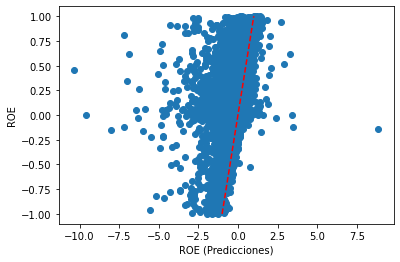


Resultados Del año 2019 datos:
MAE: 0.3833537697792053
MSE: 0.4611627459526062
RMSE: 0.6790896654129028


In [ ]:
# Evaluando el modelo
y_pred = []
y_true = []
modelo.train(False)
for inputs, targets in train_loader:
  y_pred.extend(modelo(inputs).data.numpy())
  y_true.extend(targets.numpy())
plt.scatter(y_pred, y_true)
plt.ylabel('ROE')
plt.xlabel('ROE (Predicciones)')
plt.plot([-1,1], [-1, 1], '--k', c='r')
plt.show()
    # Calculando Errores
mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
mse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=True)
rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
print(f"\nResultados Del año 2019 datos:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

A relación con nuestro trabajo anterios, en la gráfica ya nos permite mostrar mas datos, es por eso que se procedio a cambiar las varibles, lo cual nos permitio obtener un MAE bajo, por ende se puede decir que el modelo si esta **PREDICIENDO**

###**DESCRIPCIÓN CATEGORIAS - ROE**

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0, flags=flags)


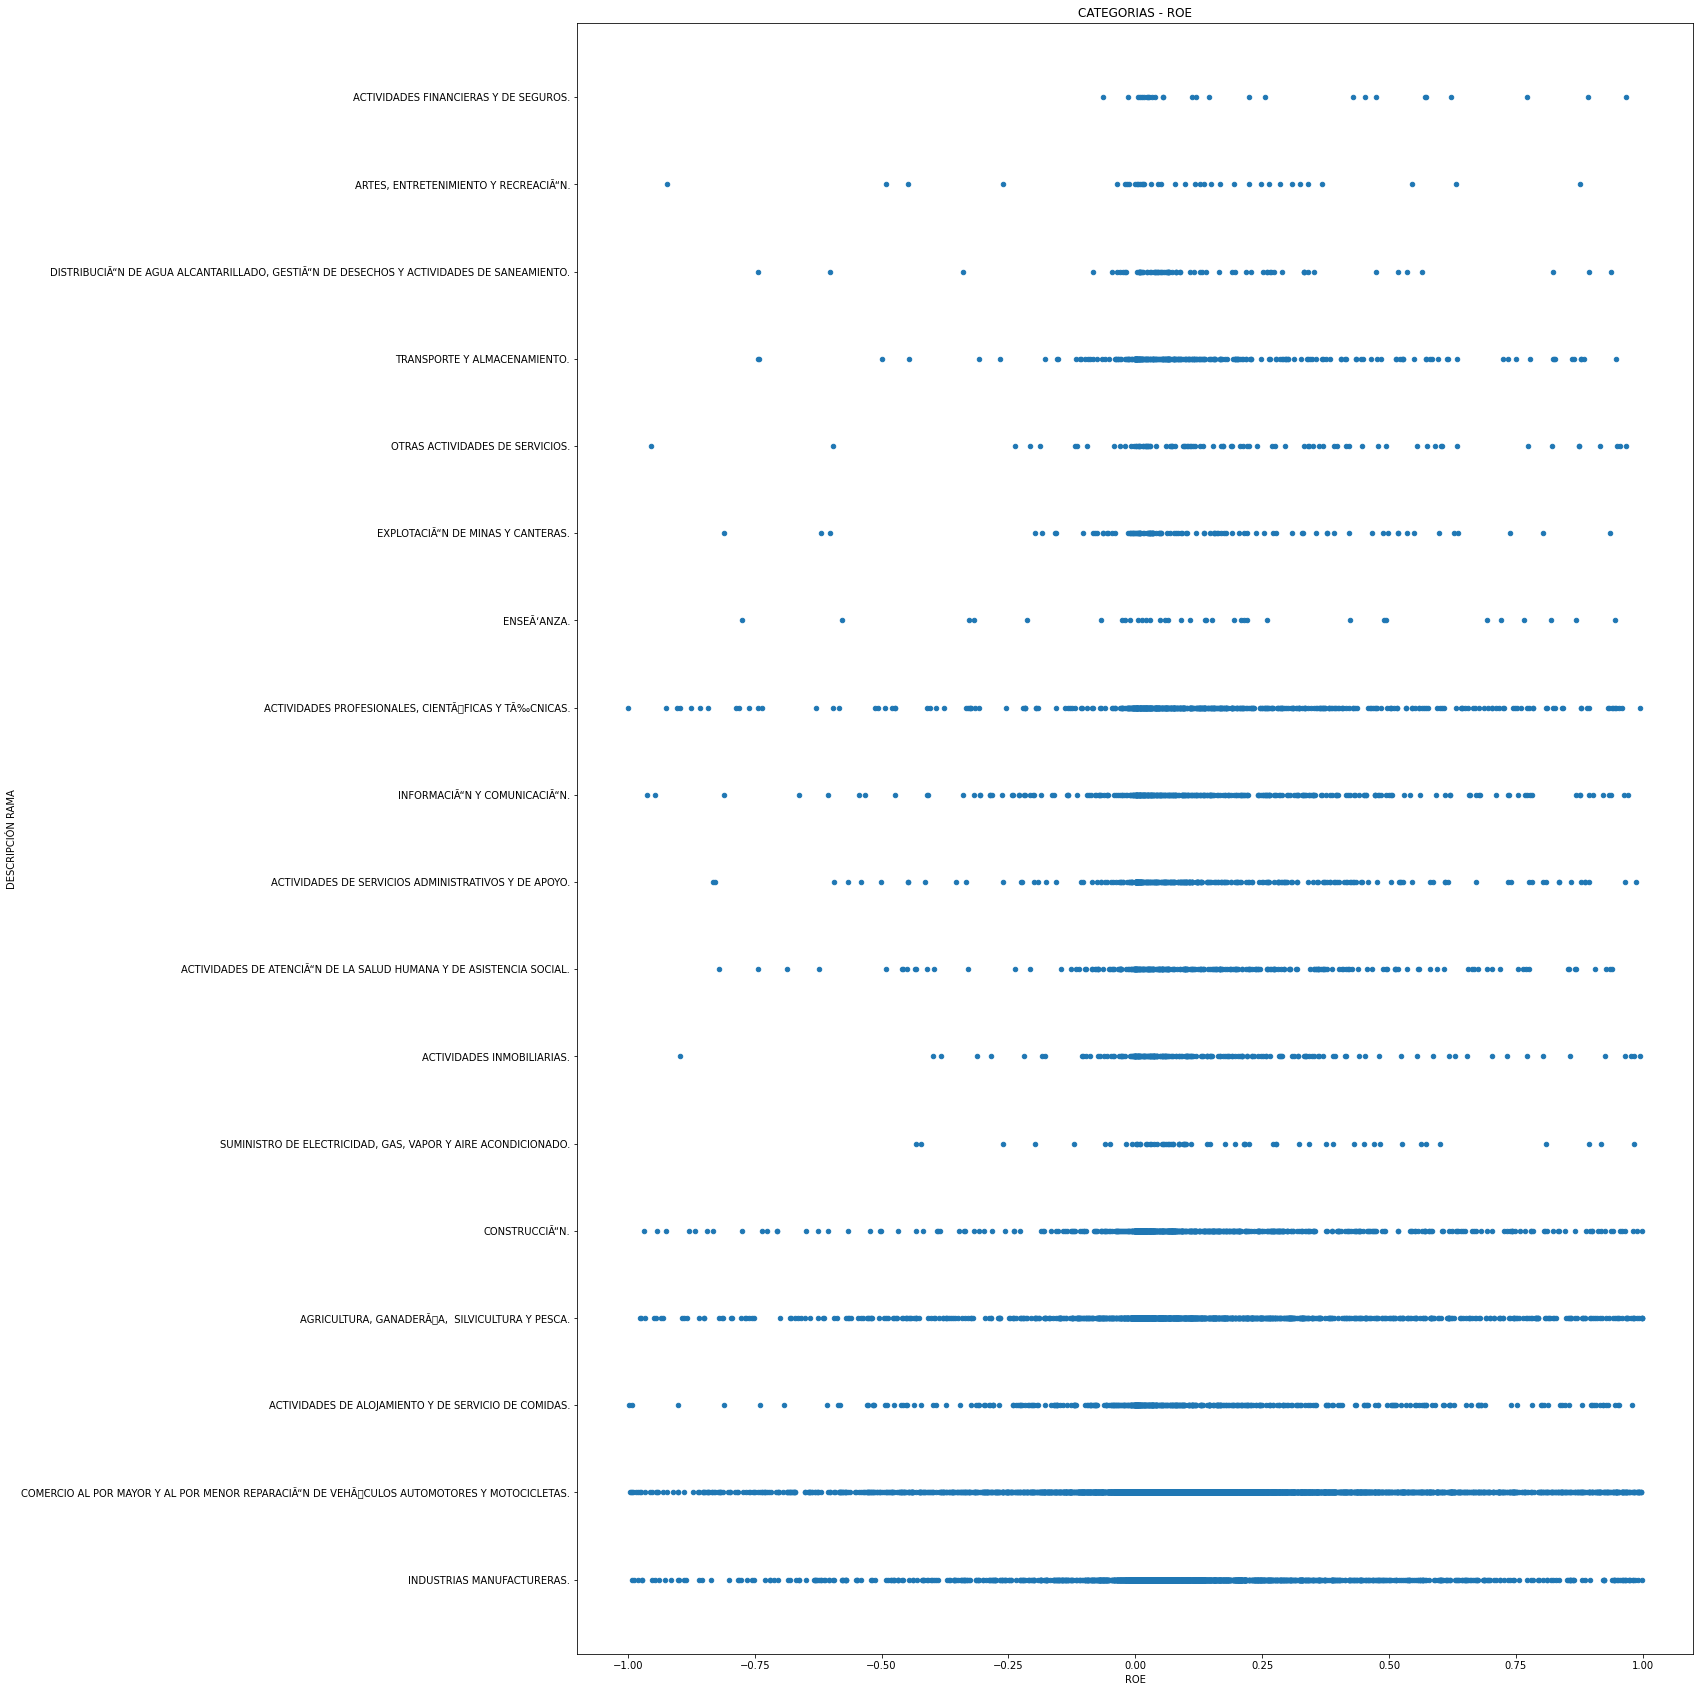

In [ ]:
dfs_rg_l.plot.scatter(x='ROE',y= 'DESCRIPCIÓN RAMA', figsize=(20,30),title="CATEGORIAS - ROE")

In [ ]:
import glob
import os

def Categoria_Lineal():


  categ =  dfs_rg_l[['RAMA']].values
  dfs_rg_l['RAMA'] = categ
  metrics = {"DESCRIPCIÓN": [], "MAE": [], "MSE": [], "RMSE": []}
  grouped =  dfs_rg_l.groupby("RAMA")
  for categoria, group in grouped:
      X_Lnl = group[['RENTABLIDAD FINANCIERA','RENTABILIDAD NETA DEL ACTIVO','UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS ','ROTACIÓN DE VENTAS','ENDEUDAMIENTO PATRIMONIAL CORRIENTE']].values
      Y_Lnl = group[['ROE']].values
      # Escalando
      scaler = StandardScaler()
      inputs = scaler.fit_transform(X_Lnl)
      X_Lnl = torch.from_numpy(inputs.astype(np.float32))
      Y_Lnl = torch.from_numpy(Y_Lnl.astype(np.float32))
      dataset_test = TensorDataset(X_Lnl, Y_Lnl)
      test_loader = DataLoader(dataset_test, batch_size=bs, shuffle=True)
      # Evaluando el modelo
      y_pred = []
      y_true = []
      modelo.train(False)
      for inputs, targets in test_loader:
        y_pred.extend(modelo(inputs).data.numpy())
        y_true.extend(targets.numpy())
      # Calculando Errores
      mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
      mse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=True)
      rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
      metrics["DESCRIPCIÓN"].append(categoria)
      metrics["MAE"].append(mae)
      metrics["MSE"].append(mse)
      metrics["RMSE"].append(rmse)
          
  metrics_df = pd.DataFrame(metrics)
  metrics_df = metrics_df.sort_values("MSE")
  print("LAS CATEGORIAS MAYORES ERRORES :")
  print(metrics_df.tail(8))
  print("LAS CATEGORIAS MENORES ERRORES :")
  print(metrics_df.head(8))

**Analsis de Errores relacionados a las Categorias del Dataset**

In [ ]:
Categoria_Lineal()

LAS CATEGORIAS MAYORES ERRORES :
   DESCRIPCIÓN       MAE       MSE      RMSE
0            A  0.412707  0.499137  0.706496
8            I  0.483814  0.522686  0.722970
17           S  0.502023  0.532860  0.729972
1            B  0.452261  0.546721  0.739406
15           Q  0.446608  0.566464  0.752638
10           K  0.551755  0.569030  0.754341
9            J  0.445464  0.589760  0.767958
14           P  0.562968  0.614453  0.783870
LAS CATEGORIAS MENORES ERRORES :
   DESCRIPCIÓN       MAE       MSE      RMSE
4            E  0.418957  0.395359  0.628776
16           R  0.413242  0.401511  0.633649
7            H  0.416804  0.433548  0.658444
6            G  0.364098  0.434900  0.659469
2            C  0.378576  0.456548  0.675683
3            D  0.504625  0.459510  0.677871
12           M  0.396806  0.463447  0.680769
11           L  0.393899  0.469438  0.685155


##**PREDICCIÓN**


###**PREDICCIÓN 2017**

**Modelo Predictivo lineal del 2017**

In [ ]:
df_2017 = pd.read_csv('/content/drive/My Drive/ProyectoDatasets/indicadores2017.csv' )
#Remover Outliers
df_2017 = df_2017[(df_2017['ROE'] > -1) & (df_2017['ROE'] < 1) & (df_2017['RENTABLIDAD FINANCIERA'] < 100) & (df_2017['UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS '] > -10) &
            (df_2017['RENTABILIDAD NETA DEL ACTIVO'] > -3) & (df_2017['ROTACIÓN DE VENTAS'] < 10) & (df_2017['ENDEUDAMIENTO PATRIMONIAL CORRIENTE'] < 400)]
dfsX_2017 = df_2017[[  'RENTABLIDAD FINANCIERA','RENTABILIDAD NETA DEL ACTIVO','UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS ','ROTACIÓN DE VENTAS','ENDEUDAMIENTO PATRIMONIAL CORRIENTE']].values
dfsY_2017 = df_2017[['ROE']].values

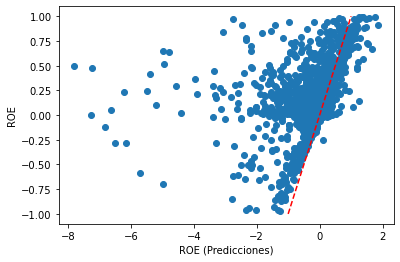


Resultados Del año 2017 datos:
MAE: 0.27607008814811707
MSE: 0.48854225873947144
RMSE: 0.6989579796791077


In [ ]:
scaler = StandardScaler()
inputs = scaler.fit_transform(dfsX_2017)
inputs_rl = np.array(inputs, dtype='float32')
dY_2017 = np.array(dfsY_2017, dtype='float32')
from torch.utils.data import TensorDataset
X_2017 = torch.from_numpy(inputs_rl)
Y_2017 = torch.from_numpy(dY_2017)
dataset_test = TensorDataset(X_2017, Y_2017)
test_loader = DataLoader(dataset_test, batch_size=bs, shuffle=True)
 # Evaluando el modelo
y_pred = []
y_true = []
modelo.train(False)
for inputs, targets in test_loader:
  y_pred.extend(modelo(inputs).data.numpy())
  y_true.extend(targets.numpy())
plt.scatter(y_pred, y_true)
plt.ylabel('ROE')
plt.xlabel('ROE (Predicciones)')
plt.plot([-1,1], [-1, 1], '--k', c='r')
plt.show()
    # Calculando Errores
mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
mse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=True)
rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
print(f"\nResultados Del año 2017 datos:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

**Los Datos del MAE son inferiores a 1, lo que nos dice que el modelo si aprendio**

In [ ]:
x_2017 = torch.from_numpy(np.array([[-0.183871,	-0.068310,	-0.102356,	-0.282979,	-0.038027]], 
  dtype='float32'))
y_2017 = modelo(x_2017) #predicción
print(y_2017)

tensor([[-0.0462]], grad_fn=<AddmmBackward0>)


In [ ]:
x_2017 = torch.from_numpy(np.array([[dfsX_2017]], 
  dtype='float32'))
y_2017 = modelo(x_2017) #predicción
print('prediccion media : ',y_2017.mean())
print('prediccion maxima : ',y_2017.max())
print('prediccion minima : ',y_2017.min())

prediccion media :  tensor(-1.4840, grad_fn=<MeanBackward0>)
prediccion maxima :  tensor(0.2195, grad_fn=<MaxBackward1>)
prediccion minima :  tensor(-118.0781, grad_fn=<MinBackward1>)


###**PREDICCIÓN 2018**

In [ ]:
df_2018 = pd.read_csv('/content/drive/My Drive/ProyectoDatasets/indicadores2018.csv' )
#Remover Outliers
df_2018 =df_2018[(df_2018['ROE'] > -1) & (df_2018['ROE'] < 1) & (df_2018['RENTABLIDAD FINANCIERA'] < 100) & (df_2018['UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS '] > -10) &
            (df_2018['RENTABILIDAD NETA DEL ACTIVO'] > -3) & (df_2018['ROTACIÓN DE VENTAS'] < 10) & (df_2018['ENDEUDAMIENTO PATRIMONIAL CORRIENTE'] < 400)]
dfsX_2018 = df_2018[[  'RENTABLIDAD FINANCIERA','RENTABILIDAD NETA DEL ACTIVO','UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS ','ROTACIÓN DE VENTAS','ENDEUDAMIENTO PATRIMONIAL CORRIENTE']].values
dfsY_2018 = df_2018[['ROE']].values

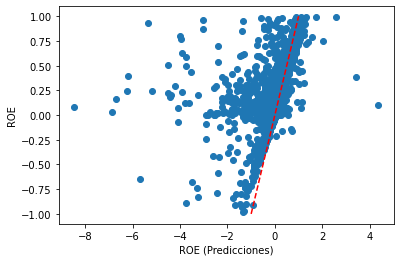


Resultados Del año 2018 datos:
MAE: 0.2655978202819824
MSE: 0.4595314860343933
RMSE: 0.677887499332428


In [ ]:
scaler = StandardScaler()
inputs = scaler.fit_transform(dfsX_2018)
inputs_2018 = np.array(inputs, dtype='float32')
dY_2018 = np.array(dfsY_2018, dtype='float32')
from torch.utils.data import TensorDataset
X_2018 = torch.from_numpy(inputs_2018)
Y_2018 = torch.from_numpy(dY_2018)
dataset_test = TensorDataset(X_2018, Y_2018)
test_loader = DataLoader(dataset_test, batch_size=bs, shuffle=True)
 # Evaluando el modelo
y_pred = []
y_true = []
modelo.train(False)
for inputs, targets in test_loader:
  y_pred.extend(modelo(inputs).data.numpy())
  y_true.extend(targets.numpy())
plt.scatter(y_pred, y_true)
plt.ylabel('ROE')
plt.xlabel('ROE (Predicciones)')
plt.plot([-1,1], [-1, 1], '--k', c='r')
plt.show()
    # Calculando Errores
mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
mse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=True)
rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
print(f"\nResultados Del año 2018 datos:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

In [ ]:
x_2018 = torch.from_numpy(np.array([[-0.051793,	-0.046931,	-0.042815,	-0.111525,	-0.038796]], 
  dtype='float32'))
y_2018 = modelo(x_2018) #predicción
print(y_2018)

tensor([[-0.0814]], grad_fn=<AddmmBackward0>)


In [ ]:
x_2018 = torch.from_numpy(np.array([[dfsX_2018]], 
  dtype='float32'))
y_2018 = modelo(x_2018) #predicción
print('prediccion media : ',y_2018.mean())
print('prediccion maxima : ',y_2018.max())
print('prediccion minima : ',y_2018.min())

prediccion media :  tensor(-1.4935, grad_fn=<MeanBackward0>)
prediccion maxima :  tensor(0.8323, grad_fn=<MaxBackward1>)
prediccion minima :  tensor(-132.5071, grad_fn=<MinBackward1>)


###**PREDICCIÓN 2019**

In [ ]:
x_2019 = torch.from_numpy(np.array([[-0.144397	,-0.030758,	-0.147701,	-0.053338	,-0.031462]], 
  dtype='float32'))
y_2019 = modelo(x_2019) #predicción
print(y_2019)

tensor([[-0.0887]], grad_fn=<AddmmBackward0>)


In [ ]:
x_2019 = torch.from_numpy(np.array([[dX]], 
  dtype='float32'))
y_2019 = modelo(x_2019) #predicción
print(y_2019.mean())
print('prediccion media : ',y_2019.mean())
print('prediccion maxima : ',y_2019.max())
print('prediccion minima : ',y_2019.min())

tensor(-0.1251, grad_fn=<MeanBackward0>)
prediccion media :  tensor(-0.1251, grad_fn=<MeanBackward0>)
prediccion maxima :  tensor(8.8703, grad_fn=<MaxBackward1>)
prediccion minima :  tensor(-10.3494, grad_fn=<MinBackward1>)


###**PREDICCIÓN 2020**

In [ ]:
df_2020 = pd.read_csv('/content/drive/My Drive/ProyectoDatasets/indicadores2020.csv' )
#Remover Outliers
df_2020 = df_2020[(df_2020['ROE'] > -1) & (df_2020['ROE'] < 1) & (df_2020['RENTABLIDAD FINANCIERA'] < 100) & (df_2020['UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS '] > -10) &
            (df_2020['RENTABILIDAD NETA DEL ACTIVO'] > -3) & (df_2020['ROTACIÓN DE VENTAS'] < 10) & (df_2020['ENDEUDAMIENTO PATRIMONIAL CORRIENTE'] < 400)]
dfsX_2020 = df_2020[[  'RENTABLIDAD FINANCIERA','RENTABILIDAD NETA DEL ACTIVO','UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS ','ROTACIÓN DE VENTAS','ENDEUDAMIENTO PATRIMONIAL CORRIENTE']].values
dfsY_2020 = df_2020[['ROE']].values

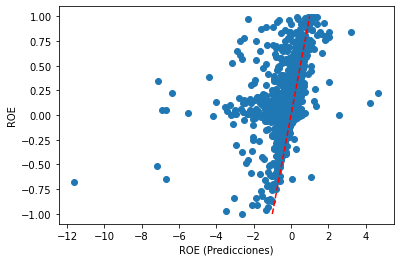


Resultados Del año 2020 datos:
MAE: 0.25803667306900024
MSE: 0.45566073060035706
RMSE: 0.6750264763832092


In [ ]:
scaler = StandardScaler()
inputs = scaler.fit_transform(dfsX_2020)
inputs_2020 = np.array(inputs, dtype='float32')
dY_2020 = np.array(dfsY_2020, dtype='float32')
from torch.utils.data import TensorDataset
X_2020 = torch.from_numpy(inputs_2020)
Y_2020 = torch.from_numpy(dY_2020)
dataset_test = TensorDataset(X_2020, Y_2020)
test_loader = DataLoader(dataset_test, batch_size=bs, shuffle=True)
 # Evaluando el modelo
y_pred = []
y_true = []
modelo.train(False)
for inputs, targets in test_loader:
  y_pred.extend(modelo(inputs).data.numpy())
  y_true.extend(targets.numpy())
plt.scatter(y_pred, y_true)
plt.ylabel('ROE')
plt.xlabel('ROE (Predicciones)')
plt.plot([-1,1], [-1, 1], '--k', c='r')
plt.show()
    # Calculando errores
mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
mse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=True)
rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
print(f"\nResultados Del año 2020 datos:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

In [ ]:
x_2020 = torch.from_numpy(np.array([[0.056737,	0.049883,	-0.055170,	0.361231,	-0.048506]], 
  dtype='float32'))
y_2020 = modelo(x_2020) #predicción
print(y_2020)

tensor([[-0.1814]], grad_fn=<AddmmBackward0>)


In [ ]:
x_2020 = torch.from_numpy(np.array([[dfsX_2020]], 
  dtype='float32'))
y_2020 = modelo(x_2020) #predicción
print('prediccion media : ',y_2020.mean())
print('prediccion maxima : ',y_2020.max())
print('prediccion minima : ',y_2020.min())

prediccion media :  tensor(-1.3337, grad_fn=<MeanBackward0>)
prediccion maxima :  tensor(1.0710, grad_fn=<MaxBackward1>)
prediccion minima :  tensor(-128.4005, grad_fn=<MinBackward1>)


#**Modelo De Regresión Logística -- ROA**

**La regresión logística resulta útil para los casos en los que se desea predecir la presencia o ausencia de una característica o resultado según los valores de un conjunto de predictores.** 

In [ ]:
dfs_Rg_Log =  df_indicadores2019[['ROA','DESCRIPCIÓN RAMA','RAMA','RENTABILIDAD NETA DEL ACTIVO','RENTABLIDAD FINANCIERA','RENTABILIDAD NETA DE VENTAS',	'ENDEUDAMIENTO A CORTO PLAZO','ROTACIÓN DE ACTIVO FIJO']]
#Remover Outliers
dfs_Rg_Log = dfs_Rg_Log[(dfs_Rg_Log['ROA'] > -1) & (dfs_Rg_Log['ROA'] < 1) & (dfs_Rg_Log['RENTABILIDAD NETA DEL ACTIVO'] < 500) & (dfs_Rg_Log['RENTABLIDAD FINANCIERA'] > -1) &
            (dfs_Rg_Log['ENDEUDAMIENTO A CORTO PLAZO'] > -5) & (dfs_Rg_Log['RENTABILIDAD NETA DE VENTAS'] < 150) & (dfs_Rg_Log['ROTACIÓN DE ACTIVO FIJO'] < 400)]
dfs_Rg_Log

,ROA,DESCRIPCIÓN RAMA,RAMA,RENTABILIDAD NETA DEL ACTIVO,RENTABLIDAD FINANCIERA,RENTABILIDAD NETA DE VENTAS,ENDEUDAMIENTO A CORTO PLAZO,ROTACIÓN DE ACTIVO FIJO
1,0.013612,INDUSTRIAS MANUFACTURERAS.,C,0.013612,0.029656,0.020263,0.439404,1.253369
2,-0.016565,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...,G,-0.016565,-0.046171,-0.015524,0.249943,23.307087
4,0.016383,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...,G,0.016383,0.058648,0.015335,0.862808,99.475136
7,-0.031462,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...,G,-0.031462,-0.147701,-0.054559,0.648102,1.933763
8,0.028136,INDUSTRIAS MANUFACTURERAS.,C,0.028136,0.055154,0.025275,0.586684,3.066147
...,...,...,...,...,...,...,...,...
84795,0.031278,ACTIVIDADES DE ATENCIÃ“N DE LA SALUD HUMANA Y ...,Q,0.031278,0.556272,0.038682,1.000000,63.926430
84841,0.094858,"AGRICULTURA, GANADERÃA, SILVICULTURA Y PESCA.",A,0.094858,0.909427,0.133201,1.000000,2.338914
85219,0.000869,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...,G,0.000869,0.567558,0.002612,1.000000,2.641550
85410,-0.053135,COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...,G,-0.053135,-0.480129,-2.653479,0.263254,0.048726


In [ ]:
df_X_Log = dfs_Rg_Log[[ 'RENTABILIDAD NETA DEL ACTIVO','RENTABLIDAD FINANCIERA','RENTABILIDAD NETA DE VENTAS',	'ENDEUDAMIENTO A CORTO PLAZO','ROTACIÓN DE ACTIVO FIJO']]
df_X_Log

,RENTABILIDAD NETA DEL ACTIVO,RENTABLIDAD FINANCIERA,RENTABILIDAD NETA DE VENTAS,ENDEUDAMIENTO A CORTO PLAZO,ROTACIÓN DE ACTIVO FIJO
1,0.013612,0.029656,0.020263,0.439404,1.253369
2,-0.016565,-0.046171,-0.015524,0.249943,23.307087
4,0.016383,0.058648,0.015335,0.862808,99.475136
7,-0.031462,-0.147701,-0.054559,0.648102,1.933763
8,0.028136,0.055154,0.025275,0.586684,3.066147
...,...,...,...,...,...
84795,0.031278,0.556272,0.038682,1.000000,63.926430
84841,0.094858,0.909427,0.133201,1.000000,2.338914
85219,0.000869,0.567558,0.002612,1.000000,2.641550
85410,-0.053135,-0.480129,-2.653479,0.263254,0.048726


In [ ]:
dfs_Y_Log = dfs_Rg_Log[['ROA']]
dfs_Y_Log

,ROA
1,0.013612
2,-0.016565
4,0.016383
7,-0.031462
8,0.028136
...,...
84795,0.031278
84841,0.094858
85219,0.000869
85410,-0.053135


In [ ]:
dfs_Y_Log['ROA_DIS'] = pd.qcut(dfs_Y_Log['ROA'], 5, labels=False)
dfs_Y_Log['ROA_DESCRIPCION'] = pd.qcut(dfs_Y_Log['ROA_DIS'], 4, labels=["MALO","REGULAR", "BUENO", "EXCELENTE"])
dfs_Y_Log

<ipython-input-57-2ddc79cd3c53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs_Y_Log['ROA_DIS'] = pd.qcut(dfs_Y_Log['ROA'], 5, labels=False)
<ipython-input-57-2ddc79cd3c53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs_Y_Log['ROA_DESCRIPCION'] = pd.qcut(dfs_Y_Log['ROA_DIS'], 4, labels=["MALO","REGULAR", "BUENO", "EXCELENTE"])


,ROA,ROA_DIS,ROA_DESCRIPCION
1,0.013612,2,REGULAR
2,-0.016565,0,MALO
4,0.016383,2,REGULAR
7,-0.031462,0,MALO
8,0.028136,2,REGULAR
...,...,...,...
84795,0.031278,3,BUENO
84841,0.094858,4,EXCELENTE
85219,0.000869,1,MALO
85410,-0.053135,0,MALO


In [ ]:
df_Y_Log = dfs_Y_Log[['ROA_DIS']]
df_Y_Log

,ROA_DIS
1,2
2,0
4,2
7,0
8,2
...,...
84795,3
84841,4
85219,1
85410,0


###**ENTRENAMIENTO - ROA**

**Graficas de los valores y rango de las varibeles "X"**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a9d4db340>,
      dtype=object)

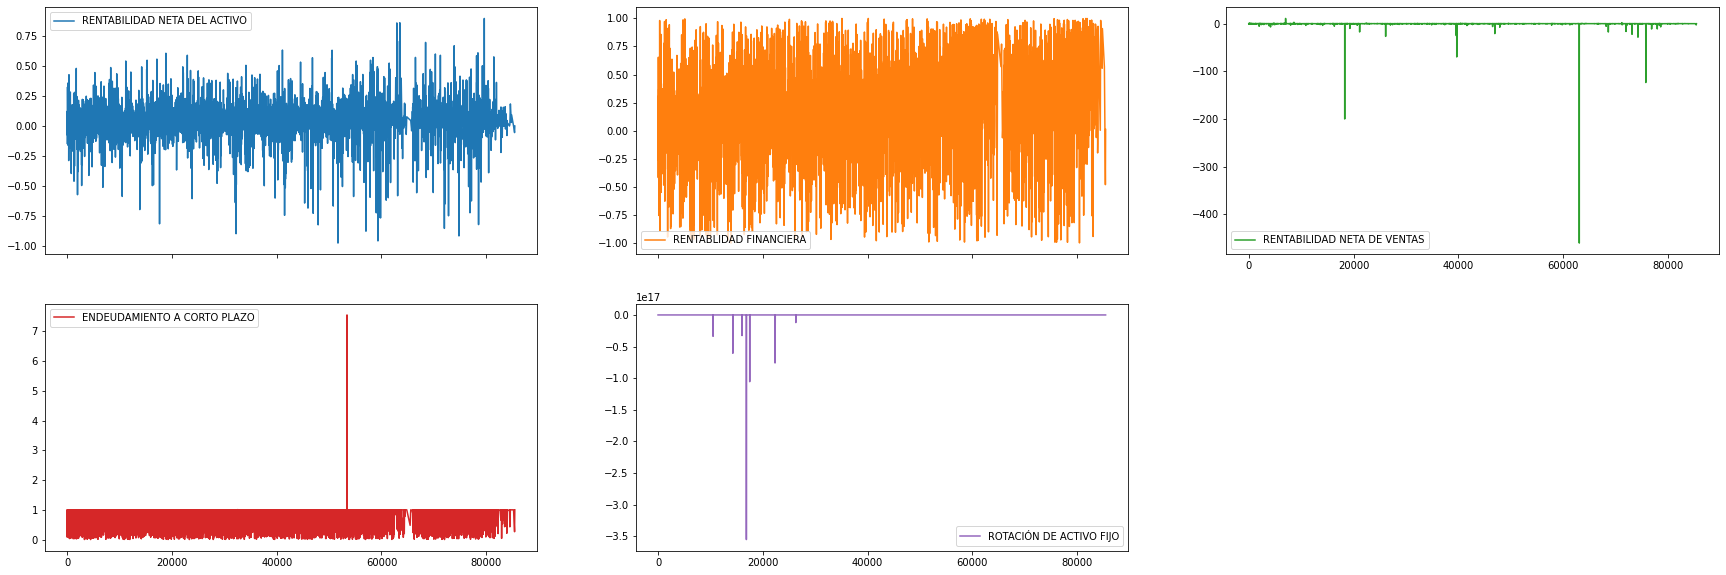

In [ ]:
df_X_Log.plot(subplots=True, layout=(-1,3), figsize=(30,10) )

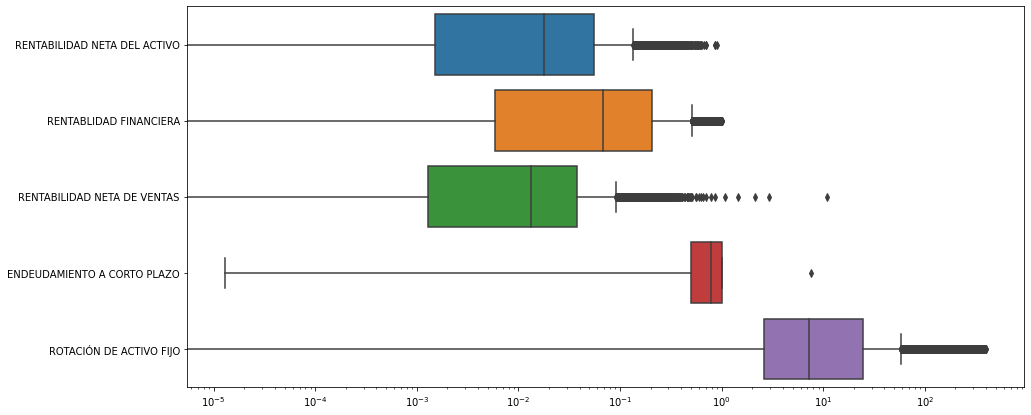

In [ ]:
plt.figure(figsize = (15,7))
ax =sns.boxplot(data = df_X_Log, orient="h")
ax.set(xscale="log")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a9c6a89d0>,
      dtype=object)

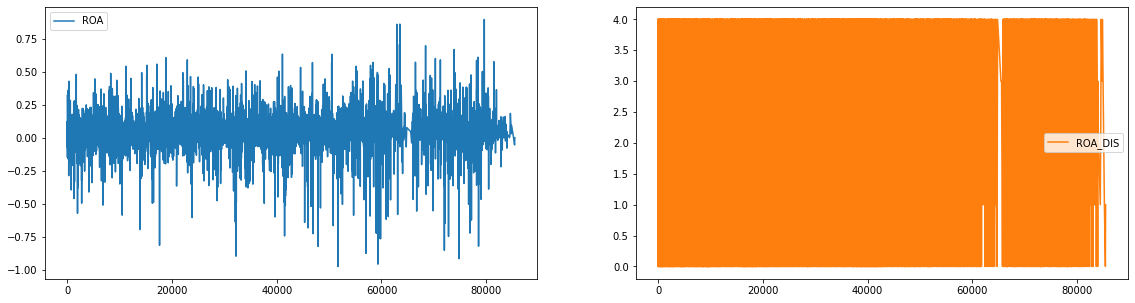

In [ ]:
dfs_Y_Log.plot(subplots=True, layout=(-1,3), figsize=(30,5) )

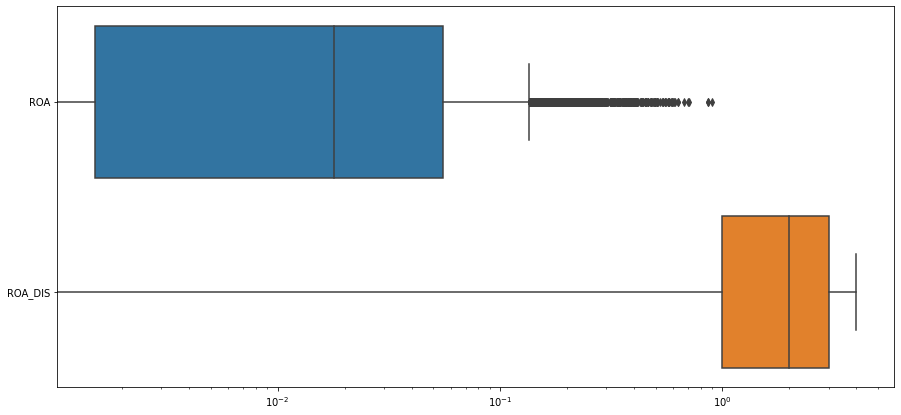

In [ ]:
plt.figure(figsize = (15,7))
ax =sns.boxplot(data = dfs_Y_Log, orient="h")
ax.set(xscale="log")
plt.show()

In [ ]:
dX_Log= np.array(df_X_Log, dtype='float32')
dY_Log= df_Y_Log['ROA_DIS'].values

In [ ]:
print('tamaño de dX INDICADORES : ',dX_Log.shape) #tamaño de dX INDICADORES 
print('tamaño de dY ROE : ',dY_Log.shape) #tamaño de dY ROA

tamaño de dX INDICADORES :  (12809, 5)
tamaño de dY ROE :  (12809,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dX_Log,dY_Log,test_size = 0.25)

In [ ]:
import sklearn
scaler = sklearn.preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
import numpy as np
x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
## describir nuevo paso - numero enteros 
y_train = torch.from_numpy(y_train.astype(np.int64))
y_test = torch.from_numpy(y_test.astype(np.int64))

In [ ]:
class LR_Model(torch.nn.Module):
  def __init__(self, n_features):
    super(LR_Model,self).__init__()
    self.logt  = torch.nn.Linear(n_features, 5)
    self.softmax = torch.nn.Softmax(dim=1)

  def forward(self, x):
    y_hat = torch.sigmoid(self.logt(x)) #regresión logistica necesita la función sigmoid
    return y_hat

#función que visualiza la evolución de la perdida y la precisión en cada epoch
def plot_loss(epochs, loss, loss_test, acc):
  plt.figure(figsize=(20,10))
  xlim = len(loss)
  plt.plot(epochs,loss)
  plt.plot(epochs,loss_test)
  plt.plot(epochs,acc)
  plt.xlabel('Epochs')
  plt.ylabel('Value')
  plt.legend(('Train loss','Test loss','Accuracy'),loc='center right',shadow=True)
  plt.title('Train and Test Loss vs Accuracy')

#función que realiza el entrenamiento
def train(num_epochs, optimizer, cost, model):
  #listas usadas para guardar los valores de pérdida, precisión, para cada epoch
  #esta información sirve para graficar el proceso de entrenamiento
  loss_vals = []
  loss_test_vals = []
  acc_vals = []
  epoch_vals = []

  #entrenamiento
  for epoch in range(num_epochs):
    y_hat = model(x_train)
    loss = cost(y_hat,y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    #se evalua cada 5 epochs
    if (epoch+1)%4 == 0:
      with torch.no_grad():
        loss_vals.append(loss.item())
        y_hat_test = model(x_test)  #se usan los datos de prueba para evaluar el modelo
        loss_test = cost(y_hat_test, y_test)
        loss_test_vals.append(loss_test.item())
        y_hat_class = y_hat_test.argmax(dim=1) #se redondea para saber si la clase es 1 o 0, recordar que sigmoid devuelve valor entre 0 y 1
        accuracy = (y_hat_class.eq(y_test).sum())/float(y_hat_test.shape[0]) #se cuenta las correctas y se divide para el total de datos de prueba
        acc_vals.append(accuracy.item())
        epoch_vals.append(epoch)
      print(f'epoch:{epoch+1} loss={loss.item()} loss_test={loss_test.item()} accuracy={accuracy.item()}')
  plot_loss(epoch_vals,loss_vals,loss_test_vals,acc_vals)   

In [ ]:
print(x_train[1])
print(y_train[1])


tensor([ 0.2424, -0.1553,  0.0210,  0.9707,  0.0179])
tensor(3)


epoch:4 loss=1.592697024345398 loss_test=1.5867736339569092 accuracy=0.2872307300567627
epoch:8 loss=1.5810785293579102 loss_test=1.575458288192749 accuracy=0.31220731139183044
epoch:12 loss=1.5700706243515015 loss_test=1.564761996269226 accuracy=0.3574773669242859
epoch:16 loss=1.5597119331359863 loss_test=1.5547822713851929 accuracy=0.4258507788181305
epoch:20 loss=1.5500587224960327 loss_test=1.5454994440078735 accuracy=0.46175459027290344
epoch:24 loss=1.5410778522491455 loss_test=1.536903977394104 accuracy=0.49047768115997314
epoch:28 loss=1.532776951789856 loss_test=1.528973937034607 accuracy=0.48173588514328003
epoch:32 loss=1.52507746219635 loss_test=1.5215288400650024 accuracy=0.4536372125148773
epoch:36 loss=1.5178749561309814 loss_test=1.5144448280334473 accuracy=0.42959725856781006
epoch:40 loss=1.511138677597046 loss_test=1.5078777074813843 accuracy=0.41117700934410095
epoch:44 loss=1.5049469470977783 loss_test=1.501847743988037 accuracy=0.39900094270706177
epoch:48 loss=1

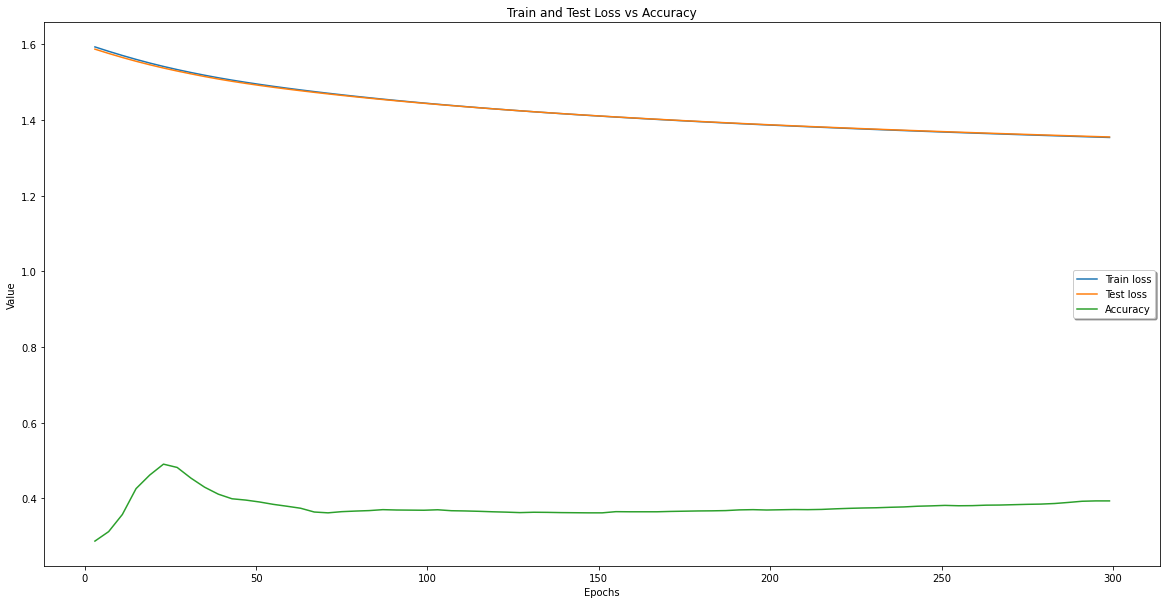

In [ ]:
n_features = dX.shape[1] #en este caso 30 features
lr_model = LR_Model(n_features)
costo =  torch.nn.CrossEntropyLoss()  
optim = torch.optim.Adam(lr_model.parameters(),lr=0.01) #gradiente descendente
train(num_epochs=300, optimizer=optim, cost=costo, model=lr_model)

In [ ]:
print(x_test[1])

tensor([ 0.0146, -0.1974,  0.0383,  0.2201,  0.0160])


In [ ]:
features = [0.98845005,  0.06927466,  0.0363    ,  0.07008413,  0.03588073]
y_prueba = lr_model(x_test)
etiquetas = y_prueba.argmax(dim=1)
print(etiquetas)

tensor([1, 1, 2,  ..., 3, 3, 3])


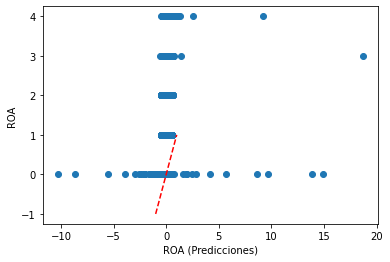


Resultados Del año 2019 datos:
MAE: 2.2098483293264506
MSE: 6.8279753601908775
Accuracy: 68.28%


In [ ]:
 # Evaluando el modelo 2019
y_pred = []
y_true = []
modelo.train(False)
for inputs, targets in test_loader:
  y_pred.extend(modelo(inputs).data.numpy())
  y_true.extend(targets.numpy())
plt.scatter(y_pred, y_true)
plt.ylabel('ROA')
plt.xlabel('ROA (Predicciones)')
plt.plot([-1,1], [-1, 1], '--k', c='r')
plt.show()
    # Calculando Errores
mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
mse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=True)
rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)

print(f"\nResultados Del año 2019 datos:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print('Accuracy: {:.2f}%'.format(mse*10))

###**DESCRIPCIÓN CATEGORIAS - ROA**

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0, flags=flags)


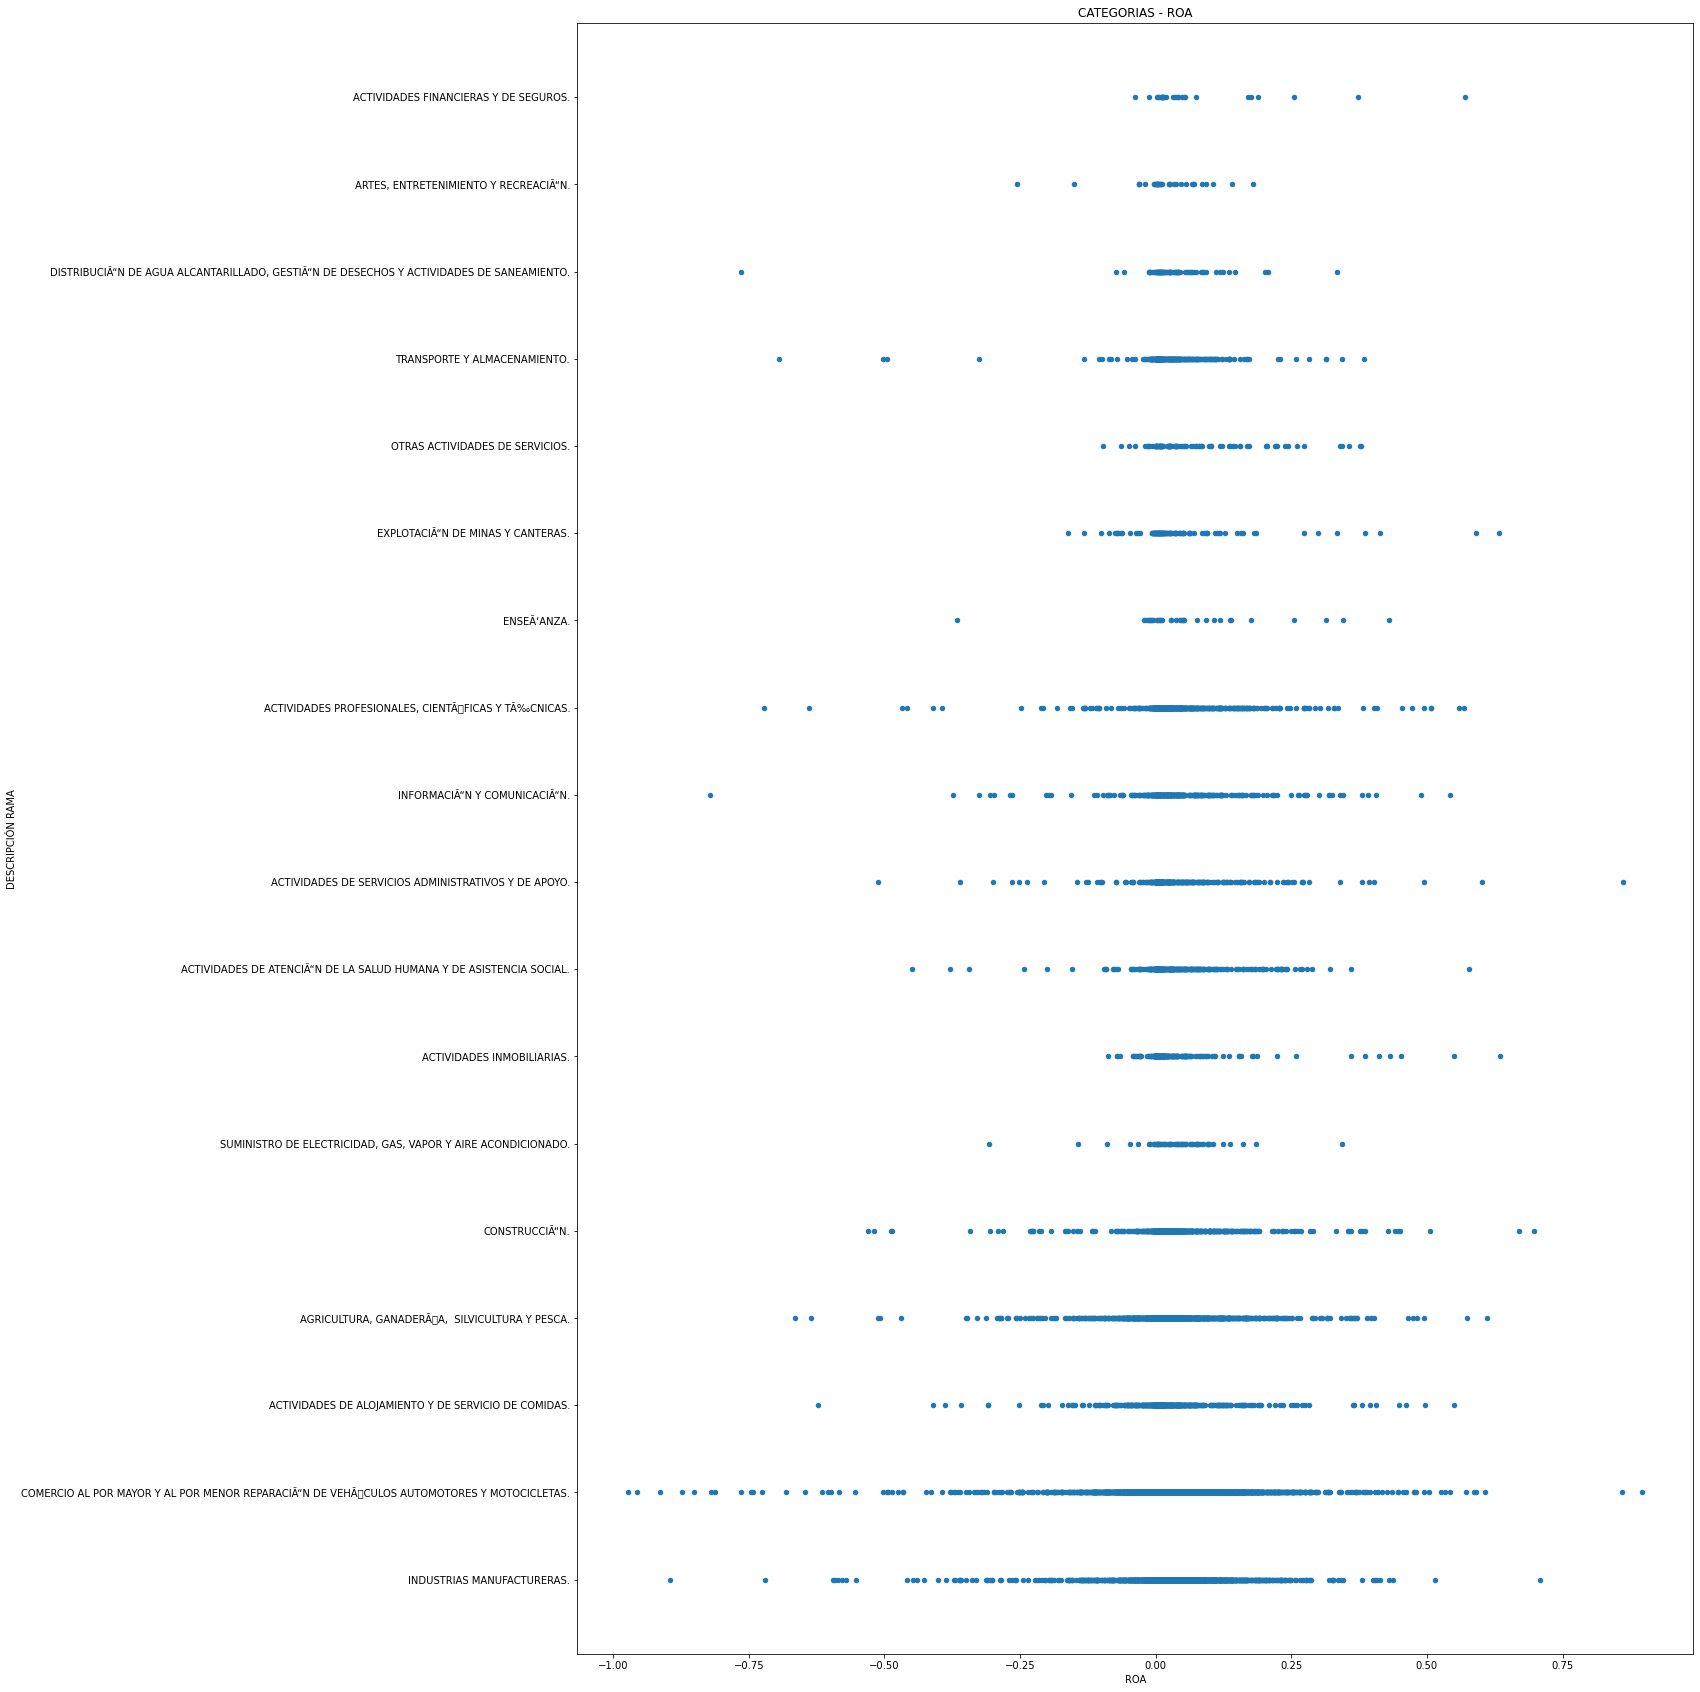

In [ ]:
dfs_Rg_Log.plot.scatter(x='ROA',y= 'DESCRIPCIÓN RAMA', figsize=(20,30),title="CATEGORIAS - ROA")

In [ ]:
import glob
import os
def Categoria_LOG():
  dfs_Rg_Log ['ROA_DIS'] = pd.qcut(dfs_Rg_Log['ROA'], 4, labels=False)
  categ =  dfs_Rg_Log[['RAMA']].values
  dfs_Rg_Log['RAMA'] = categ
  metrics = {"DESCRIPCIÓN": [],  "MSE": [], "RMSE": [],"ACC": []}
  grouped =  dfs_Rg_Log.groupby("RAMA")
  for categoria, group in grouped:
      X_rlg = group[['RENTABILIDAD NETA DEL ACTIVO','RENTABLIDAD FINANCIERA','RENTABILIDAD NETA DE VENTAS',	'ENDEUDAMIENTO A CORTO PLAZO','ROTACIÓN DE ACTIVO FIJO']].values
      Y_rlg = group[['ROA_DIS']].values
      # Escalando
      scaler = StandardScaler()
      inputs = scaler.fit_transform(X_rlg)
      X_rlg = torch.from_numpy(inputs.astype(np.float32))
      Y_rlg = torch.from_numpy(Y_rlg.astype(np.int64))
      dataset_test = TensorDataset(X_rlg, Y_rlg)
      test_loader = DataLoader(dataset_test, batch_size=bs, shuffle=True)
      # Evaluando el modelo
      y_pred = []
      y_true = []
      modelo.train(False)
      for inputs, targets in test_loader:
        y_hat_test = modelo(inputs).data.numpy()
        y_hat_class = np.argmax(y_hat_test, axis=1)
        y_pred.extend(y_hat_class)
        y_true.extend(targets.numpy())
      # Calculando Errores
      mse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=True)
      rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
      acc = accuracy_score(y_true, y_pred)
      metrics["DESCRIPCIÓN"].append(categoria)
      metrics["MSE"].append(mse)
      metrics["RMSE"].append(rmse)
      metrics["ACC"].append(acc)
  metrics_df = pd.DataFrame(metrics)
  metrics_df = metrics_df.sort_values("MSE")
  print("LAS CATEGORIAS MAYORES ERRORES :")
  print(metrics_df.tail(8))
  print("LAS CATEGORIAS MENORES ERRORES :")
  print(metrics_df.head(8))

In [ ]:
Categoria_LOG()

LAS CATEGORIAS MAYORES ERRORES :
   DESCRIPCIÓN       MSE      RMSE       ACC
13           N  3.809969  1.951914  0.218069
10           K  3.888889  1.972027  0.074074
9            J  3.909884  1.977343  0.223837
14           P  4.029412  2.007339  0.264706
12           M  4.097122  2.024135  0.208633
15           Q  4.110345  2.027399  0.241379
3            D  4.532258  2.128910  0.177419
17           S  4.775281  2.185242  0.168539
LAS CATEGORIAS MENORES ERRORES :
   DESCRIPCIÓN       MSE      RMSE       ACC
11           L  3.039409  1.743390  0.231527
16           R  3.108108  1.762983  0.324324
8            I  3.148454  1.774388  0.338144
5            F  3.314560  1.820593  0.232143
0            A  3.333333  1.825742  0.300000
1            B  3.342342  1.828207  0.252252
2            C  3.379617  1.838374  0.276368
6            G  3.491120  1.868454  0.234505


##**PREDICCIÓN - ROA**


###**PREDICCIÓN 2017**

In [ ]:
df_Log_2017 = pd.read_excel('/content/drive/My Drive/DataSets/indicadores2017_cia.xlsx' )
#Remover Outliers
df_Log_2017 = df_Log_2017[(df_Log_2017['ROA'] > -1) & (df_Log_2017['ROA'] < 1) & (df_Log_2017['RENTABILIDAD NETA DEL ACTIVO'] < 500) & (df_Log_2017['RENTABLIDAD FINANCIERA'] > -1) &
            (df_Log_2017['ENDEUDAMIENTO A CORTO PLAZO'] > -5) & (df_Log_2017['RENTABILIDAD NETA DE VENTAS'] < 150) & (df_Log_2017['ROTACIÓN DE ACTIVO FIJO'] < 400)]
            
dfsX_Log_2017 = df_Log_2017[['RENTABILIDAD NETA DEL ACTIVO','RENTABLIDAD FINANCIERA','RENTABILIDAD NETA DE VENTAS',	'ENDEUDAMIENTO A CORTO PLAZO','ROTACIÓN DE ACTIVO FIJO']].values
dfsY_Log_2017 = df_Log_2017[['ROA']]
dfsY_Log_2017['ROA_DIS'] = pd.qcut(dfsY_Log_2017['ROA'], 5, labels=False)
df_Y_Log_2017 = dfsY_Log_2017[['ROA_DIS']]

<ipython-input-77-465c45c3cee0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsY_Log_2017['ROA_DIS'] = pd.qcut(dfsY_Log_2017['ROA'], 5, labels=False)


**Verificación de la Predicción de nuestro Modelo**

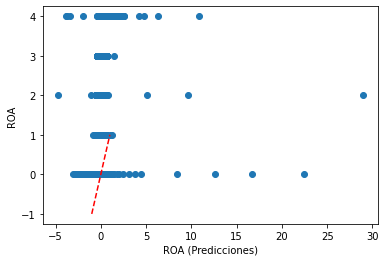


Resultados Del año 2017 datos:
MAE: 2.1673699679551777
MSE: 6.450044681234858
Accuracy: 64.50%


In [ ]:
dX_Log_2017= np.array(dfsX_Log_2017, dtype='float32')
dY_Log_2017= df_Y_Log_2017['ROA_DIS'].values
x_train, x_test, y_train, y_test = train_test_split(dX_Log_2017,dY_Log_2017,test_size = 0.25)
# SCALER
scaler = sklearn.preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
#
x_test_2017 = torch.from_numpy(x_test.astype(np.float32))
## describir nuevo paso - numero enteros 
y_test_2017 = torch.from_numpy(y_test.astype(np.int64))
dataset_test = TensorDataset(x_test_2017, y_test_2017)
test_loader = DataLoader(dataset_test, batch_size=bs, shuffle=True)

 # Evaluando el modelo
y_pred = []
y_true = []
modelo.train(False)
for inputs, targets in test_loader:
  y_pred.extend(modelo(inputs).data.numpy())
  y_true.extend(targets.numpy())
plt.scatter(y_pred, y_true)
plt.ylabel('ROA')
plt.xlabel('ROA (Predicciones)')
plt.plot([-1,1], [-1, 1], '--k', c='r')
plt.show()
    # Calculando Errores
mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
mse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=True)
rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
print(f"\nResultados Del año 2017 datos:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print('Accuracy: {:.2f}%'.format(mse*10))

In [ ]:
X_LOG_2017 = torch.from_numpy(np.array([[0.247540,	0.026774,	0.067265,	0.823185,	0.016651]], 
  dtype='float32'))
Y_LOG_2017 = modelo(X_LOG_2017) #predicción
print(Y_LOG_2017)

y_prueba_2017 = lr_model(x_test_2017)
etiquetas_2017 = y_prueba_2017.argmax(dim=1)
print(etiquetas_2017)

tensor([[-0.3473]], grad_fn=<AddmmBackward0>)
tensor([3, 2, 2,  ..., 2, 2, 2])


In [ ]:
x_LOG_2017 = torch.from_numpy(np.array([[dfsX_Log_2017]], 
  dtype='float32'))
y_LOG_2017 = modelo(x_LOG_2017) #predicción
print('prediccion media : ',y_LOG_2017.mean())
print('prediccion maxima : ',y_LOG_2017.max())
print('prediccion minima : ',y_LOG_2017.min())

prediccion media :  tensor(4.9297e+13, grad_fn=<MeanBackward0>)
prediccion maxima :  tensor(3.6393e+17, grad_fn=<MaxBackward1>)
prediccion minima :  tensor(-134.9351, grad_fn=<MinBackward1>)


###**PREDICCIÓN 2018**

In [ ]:
df_Log_2018 = pd.read_excel('/content/drive/My Drive/DataSets/indicadores2018_cia.xlsx' )
#Remover Outliers
df_Log_2018 =  df_Log_2018[(df_Log_2018['ROA'] > -1) & (df_Log_2018['ROA'] < 1) & (df_Log_2018['RENTABILIDAD NETA DEL ACTIVO'] < 500) & (df_Log_2018['RENTABLIDAD FINANCIERA'] > -1) &
            (df_Log_2018['ENDEUDAMIENTO A CORTO PLAZO'] > -5) & (df_Log_2018['RENTABILIDAD NETA DE VENTAS'] < 150) & (df_Log_2018['ROTACIÓN DE ACTIVO FIJO'] < 400)]
dfsX_Log_2018 = df_Log_2018[['RENTABILIDAD NETA DEL ACTIVO','RENTABLIDAD FINANCIERA','RENTABILIDAD NETA DE VENTAS',	'ENDEUDAMIENTO A CORTO PLAZO','ROTACIÓN DE ACTIVO FIJO']]
dfsY_Log_2018 = df_Log_2018[['ROA']]
dfsY_Log_2018['ROA_DIS'] = pd.qcut(dfsY_Log_2018['ROA'], 5, labels=False)
df_Y_Log_2018 = dfsY_Log_2018[['ROA_DIS']]

<ipython-input-81-879cda3749b5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsY_Log_2018['ROA_DIS'] = pd.qcut(dfsY_Log_2018['ROA'], 5, labels=False)


**Verificación de la Predicción de nuestro Modelo**

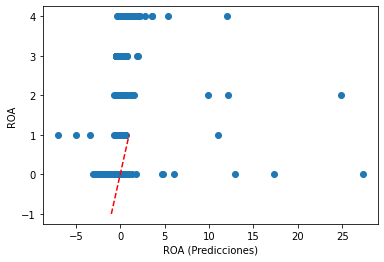


Resultados Del año 2018 datos:
MAE: 2.204159815097383
MSE: 6.621112122153066
Accuracy: 66.21%


In [ ]:
dX_Log_2018= np.array(dfsX_Log_2018, dtype='float32')
dY_Log_2018= df_Y_Log_2018['ROA_DIS'].values
x_train, x_test, y_train, y_test = train_test_split(dX_Log_2018,dY_Log_2018,test_size = 0.25)
# SCALER
scaler = sklearn.preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
#
x_test_2018 = torch.from_numpy(x_test.astype(np.float32))
y_test_2018 = torch.from_numpy(y_test.astype(np.int64))
dataset_test = TensorDataset(x_test_2018, y_test_2018)
test_loader = DataLoader(dataset_test, batch_size=bs, shuffle=True)

 # Evaluando el modelo
y_pred = []
y_true = []
modelo.train(False)
for inputs, targets in test_loader:
  y_pred.extend(modelo(inputs).data.numpy())
  y_true.extend(targets.numpy())
plt.scatter(y_pred, y_true)
plt.ylabel('ROA')
plt.xlabel('ROA (Predicciones)')
plt.plot([-1,1], [-1, 1], '--k', c='r')
plt.show()
    # Calculando Errores
mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
mse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=True)
rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
print(f"\nResultados Del año 2018 datos:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print('Accuracy: {:.2f}%'.format(mse*10))

In [ ]:
X_LOG_2018 = torch.from_numpy(np.array([[0.215171,	-0.024060,	-0.134273,	0.702969,	-0.028892]], 
  dtype='float32'))
Y_LOG_2018 = modelo(X_LOG_2018) #predicción
print(Y_LOG_2018)

y_prueba_2018 = lr_model(x_test_2018)
etiquetas_2018 = y_prueba_2018.argmax(dim=1)
print(etiquetas_2018)

tensor([[-0.2312]], grad_fn=<AddmmBackward0>)
tensor([3, 3, 2,  ..., 2, 2, 3])


In [ ]:
x_LOG_2018 = torch.from_numpy(np.array([[dfsX_Log_2018]], 
  dtype='float32'))
y_LOG_2018 = modelo(x_LOG_2018) #predicción
print('prediccion media : ',y_LOG_2018.mean())
print('prediccion maxima : ',y_LOG_2018.max())
print('prediccion minima : ',y_LOG_2018.min())

prediccion media :  tensor(2.8086e+13, grad_fn=<MeanBackward0>)
prediccion maxima :  tensor(4.1707e+17, grad_fn=<MaxBackward1>)
prediccion minima :  tensor(-135.1649, grad_fn=<MinBackward1>)


###**PREDICCIÓN 2019**

In [ ]:
X_LOG_2019 = torch.from_numpy(np.array([[0.98845005,  0.06927466,  0.0363    ,  0.07008413,  0.03588073]], 
  dtype='float32'))
Y_LOG_2019 = modelo(X_LOG_2019) #predicción
print(Y_LOG_2019)

#y_prueba_2019 = lr_model(x_test)
#etiquetas_2019 = y_prueba_2019.argmax(dim=1)
#print(etiquetas_2019)

tensor([[0.1432]], grad_fn=<AddmmBackward0>)


In [ ]:
x_LOG_2019 = torch.from_numpy(np.array([[df_X_Log]], 
  dtype='float32'))
y_LOG_2019 = modelo(x_LOG_2019) #predicción
print('prediccion media : ',y_LOG_2019.mean())
print('prediccion maxima : ',y_LOG_2019.max())
print('prediccion minima : ',y_LOG_2019.min())

prediccion media :  tensor(1.7784e+13, grad_fn=<MeanBackward0>)
prediccion maxima :  tensor(1.1972e+17, grad_fn=<MaxBackward1>)
prediccion minima :  tensor(-134.7715, grad_fn=<MinBackward1>)


###**PREDICCIÓN 2020**

In [ ]:
df_Log_2020 = pd.read_excel('/content/drive/My Drive/DataSets/indicadores2020_cia.xlsx' )
#Remover Outliers
df_Log_2020 = df_Log_2020[(df_Log_2018['ROA'] > -1) & (df_Log_2020['ROA'] < 1) & (df_Log_2018['RENTABILIDAD NETA DEL ACTIVO'] < 500) & (df_Log_2020['RENTABLIDAD FINANCIERA'] > -1) &
            (df_Log_2020['ENDEUDAMIENTO A CORTO PLAZO'] > -5) & (df_Log_2020['RENTABILIDAD NETA DE VENTAS'] < 150) & (df_Log_2020['ROTACIÓN DE ACTIVO FIJO'] < 400)]
dfsX_Log_2020 = df_Log_2020[['RENTABILIDAD NETA DEL ACTIVO','RENTABLIDAD FINANCIERA','RENTABILIDAD NETA DE VENTAS',	'ENDEUDAMIENTO A CORTO PLAZO','ROTACIÓN DE ACTIVO FIJO']].values
dfsY_Log_2020 = df_Log_2020[['ROA']]
dfsY_Log_2020['ROA_DIS'] = pd.qcut(dfsY_Log_2020['ROA'], 5, labels=False)
dfsY_Log_2020['ROA_DESCRIPCION'] = pd.qcut(dfsY_Log_2020['ROA_DIS'], 4, labels=["MALO","REGULAR", "BUENO", "EXCELENTE"])
df_Y_Log_2020 = dfsY_Log_2020[['ROA_DIS']]


<ipython-input-87-33850883ef15>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsY_Log_2020['ROA_DIS'] = pd.qcut(dfsY_Log_2020['ROA'], 5, labels=False)
<ipython-input-87-33850883ef15>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsY_Log_2020['ROA_DESCRIPCION'] = pd.qcut(dfsY_Log_2020['ROA_DIS'], 4, labels=["MALO","REGULAR", "BUENO", "EXCELENTE"])


**Verificación de la Predicción de nuestro Modelo**

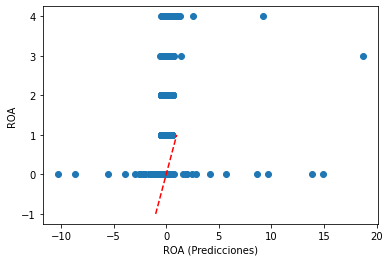


Resultados Del año 2020 datos:
MAE: 2.2098483293264506
MSE: 6.8279753601908775
Accuracy: 68.28%


In [ ]:
dX_Log_2020= np.array(dfsX_Log_2020, dtype='float32')
dY_Log_2020= df_Y_Log_2020['ROA_DIS'].values
x_train, x_test, y_train, y_test = train_test_split(dX_Log_2020,dY_Log_2020,test_size = 0.25)
# SCALER
scaler = sklearn.preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
#
x_test_2020 = torch.from_numpy(x_test.astype(np.float32))
y_test_2020 = torch.from_numpy(y_test.astype(np.int64))
dataset_test = TensorDataset(x_test_2020, y_test_2020)
test_loader = DataLoader(dataset_test, batch_size=bs, shuffle=True)

 # Evaluando el modelo
y_pred = []
y_true = []
modelo.train(False)
for inputs, targets in test_loader:
  y_pred.extend(modelo(inputs).data.numpy())
  y_true.extend(targets.numpy())
plt.scatter(y_pred, y_true)
plt.ylabel('ROA')
plt.xlabel('ROA (Predicciones)')
plt.plot([-1,1], [-1, 1], '--k', c='r')
plt.show()
    # Calculando Errores
mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
mse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=True)
rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
print(f"\nResultados Del año 2020 datos:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print('Accuracy: {:.2f}%'.format(mse*10))

In [ ]:
X_LOG_2020 = torch.from_numpy(np.array([[0.215171,	-0.024060,	-0.134273,	0.702969,	-0.028892]], 
  dtype='float32'))
Y_LOG_2020 = modelo(X_LOG_2020) #predicción
print(Y_LOG_2020)

y_prueba_2020 = lr_model(x_test_2020)
etiquetas_2020 = y_prueba_2020.argmax(dim=1)
print(etiquetas_2020)

tensor([[-0.2312]], grad_fn=<AddmmBackward0>)
tensor([3, 3, 3,  ..., 2, 1, 1])


In [ ]:
x_LOG_2020 = torch.from_numpy(np.array([[df_X_Log]], 
  dtype='float32'))
y_LOG_2020 = modelo(x_LOG_2020) #predicción
print('prediccion media : ',y_LOG_2020.mean())
print('prediccion maxima : ',y_LOG_2020.max())
print('prediccion minima : ',y_LOG_2020.min())

prediccion media :  tensor(1.7784e+13, grad_fn=<MeanBackward0>)
prediccion maxima :  tensor(1.1972e+17, grad_fn=<MaxBackward1>)
prediccion minima :  tensor(-134.7715, grad_fn=<MinBackward1>)


#**RESULTADOS PREDICCIONES ROE / ROA**

##**¿Qué Año Predice Mejor y Peor?**

###**RESULTADO - ROE**

####**TABLA RESULTADOS REGRESIÓN LINEAL**


```
 POR AÑO
```

Errores | 2017 | 2018 | 2019 | 2020 
--- | -------------- | ---------- | ---------- | ---------- 
MAE  |  0.2760            |   0.26559   | 0.38335    |  0.2580
MSE  |0.4885          |0.45953    | 0.461162   |0.4556
RMSE | 0.6989           |0.6778   | 0.679089  | 0.67502

---

Pred_Dist | 2017 | 2018 | 2019 | 2020 
--- | -------------- | ---------- | ---------- | ---------- 
ROE  | 0.05435            | 0.22508         | 0.39520         | 0.42733     

---

Pred_Min | 2017 | 2018 | 2019 | 2020 
--- | -------------- | ---------- | ---------- | ---------- 
ROE |-11.0781    |-13.5071  | -10.3494        | -18.409

---

Pred_Max | 2017 | 2018 | 2019 | 2020 
--- | -------------- | ---------- | ---------- | ---------- 
ROE    | 0.2195      |0.8323  | 8.8703        | 1.0710

---

Pred_Media | 2017 | 2018 | 2019 | 2020 
--- | -------------- | ---------- | ---------- | ---------- 
ROE      |-1.4840    |-1.4935     | -0.1251        | -1.3337

---       


###**RESULTADO - ROA**

####**TABLA RESULTADOS REGRESIÓN LOGISTICA**

```
 POR AÑO
```


Errores | 2017 | 2018 | 2019 | 2020 
--- | -------------- | ---------- | ---------- | ---------- 
MAE  |  2.167            |  2.204         | 1.984        | 2.209
MSE  |6.450           |6.621         | 5.879        | 6.827
Accuracy | 64.50%           | 66.21%        | 58.79%       | 68.28%

---

Pred_Dist | 2017 | 2018 | 2019 | 2020 
--- | -------------- | ---------- | ---------- | ---------- 
ROA  | -0.0903            | 0.1727         | -0.1796        | -0.1727

---

Pred_Min | 2017 | 2018 | 2019 | 2020 
--- | -------------- | ---------- | ---------- | ---------- 
ROA  | -14.936           |  -13.164     |-13.771        | -13.77

---

Pred_Max | 2017 | 2018 | 2019 | 2020 
--- | -------------- | ---------- | ---------- | ---------- 
ROA  | 3.6393           | 4.1707         | 1.197       | 1.197

---

Pred_Media | 2017 | 2018 | 2019 | 2020 
--- | -------------- | ---------- | ---------- | ---------- 
ROA  |4.929           | 2.808         | 1.778       | 1.77

---



##**¿Qué categoría de empresas predice mejor y peor?**

###**RESULTADO - ROE**

####**TABLA RESULTADOS REGRESIÓN LINEAL - ROE**

```
 CATEGORIAS - RAMA - ROE
```

DESCRIPCIÓN |RAMA |  MAE |  MSE | RMSE   
--- | -------------- | ---------- | ----------| ----------  
MINAS Y CANTERAS|B  |0.486445  |0.393775 | 0.627515     
ARTES|R  | 0.481757  |0.459923  |0.678176 
AGRICULTURA |A |  0.501536  |0.556991  |0.746319   
ACTIVIDADES FINANCIERAS|K  | 0.562317  |0.531041  |0.728726
OTRAS ACTIVIDADES DE SERVICIOS |S | 0.539458  |0.572015 | 0.756317     
ACTIVIDADES INMOBILIARIAS|L  | 0.445892 | 0.438722|  0.662361
ENSEÑANZA. |P| 0.693323|  0.993659|  0.996824 
SERVICIOS ADMINISTRATIVOS|N   |  0.477971 | 0.510848|  0.714737
COMUNICACION|J  |   0.509812|  0.560664 | 0.748775
DIST AGUA ALCANTARILLADO|E |  0.416877  |0.443153|  0.665698   
TRANSPORTE |H |  0.461001  |0.466719  |0.683168
SALUD HUMANA  |Q| 0.509160|  0.502433|  0.708825  
INDUSTRIAS MANUFACTURERAS  |C |0.447776 | 0.483757 | 0.695526
ACTIVIDADES PROFESIONALES|M|0.501314 | 0.580471  |0.761886
SUMINISTRO DE ELECTRICIDAD|D  |0.494666|  0.481828  |0.694139
COMERCIO AL POR MAYOR	|G|0.459191|  0.488442|  0.698886


###**RESULTADO - ROA**

####**TABLA RESULTADOS REGRESIÓN LOGISTICA - ROA**

```
 CATEGORIAS - RAMA - ROA
```

DESCRIPCIÓN |RAMA |  MSE    |  RMSE    |   ACC  
--- | -------------- | ---------- | ----------| ----------  
MINAS Y CANTERAS|B  | 3.342342 | 1.828207  |0.252252     
ARTES|R  |3.108108 | 1.762983|  0.324324  
COMERCIO AL POR MAYOR|G | 3.491120 | 1.868454 | 0.234505
AGRICULTURA |A | 3.333333 | 1.825742 | 0.300000    
ACTIVIDADES FINANCIERAS|K  | 3.888889|  1.972027 | 0.074074
OTRAS ACTIVIDADES DE SERVICIOS |S | 4.775281  |2.185242|  0.168539  
SUMINISTRO DE ELECTRICIDAD|D  | 4.532258  |2.128910 | 0.177419     
ACTIVIDADES INMOBILIARIAS|L  | 3.039409 | 1.743390  |0.231527
ENSEÑANZA. |P| 4.029412|  2.007339 | 0.264706     
SERVICIOS ADMINISTRATIVOS|N   |  3.809969|  1.951914|  0.218069
COMUNICACION|J  | 3.909884|  1.977343 | 0.223837 
ACTIVIDADES PROFESIONALES|M  | 4.097122 | 2.024135 | 0.208633
SALUD HUMANA  |Q|4.110345|  2.027399 | 0.241379 
SERVICIO DE COMIDAS |I  |3.148454 | 1.774388 | 0.338144 
CONSTRUCCION |F  |3.314560  |1.820593 | 0.232143
INDUSTRIAS MANUFACTURERAS |C  | 3.379617  |1.838374  |0.276368

---


#**CONCLUSIÓN**

#**¿Qué año predice mejor y peor?**

    Podemos idenfiticar mediante el analisis que el año que precide Mejor / Peor en el ROE:

 *   En el ROE el mejor es el año 2018 ya que tiene una distancia predicción de solo  0.05435 en comparación de los otros años con un menor de error MAE: 0.45953
*   Su peor año 2020 ya que tiene una distancia predicción del mas elevado de 0.0.39520  con un mayor de error MAE: 0.4556


    Podemos idenfiticar mediante el analisis que el año que precide Mejor / Peor en el ROA:

 *   En el ROA el mejor es el año 2017 ya que tiene una distancia predicción de solo  0.1727 en comparación de los otros años con un error MAE:2.167,  Accuracy = 64.50%   

*   Su peor año 2020 ya que tiene una distancia predicción -0.1796 con un mayor de error MAE: 2.209, Accuracy = 68.28% 
_____________________________________________________________________________

#**¿Qué categoría de empresas predice mejor y peor?**

    Podemos idenfiticar mediante el analisis que la categoria que precide Mejor / Peor en el ROE:

*   En el ROE la categoria que predicen mejor y con menos errores son las empresas de dits agua alcantarillado  MSE =0.395359, artes MSE = 0.401511  , actividades de servicios MSE =  0.453657.
*   Con las peores empresas que predicen con un mayor error son las empresas de  agricultura MSE = 0.499137, servicio de comidas MSE =  0.522686 , transporte MSE = 0.433548


    Podemos idenfiticar mediante el analisis que la categoria que precide Mejor / Peor en el ROA:
*   En el ROA la categoria que predicen mejor y con menos errores son las empresas de actividades financieras ACC = 0.074074, servicios administrativos ACC = 0.218069 , comunicacion ACC = 0.223837
*   Con las peores empresas que predicen con un mayor error son las empresas de artes  ACC = 0.324324, servicio de comida ACC = 0.338144  ,agricultura ACC =  0.300000